# Selección de modelos

* Tenemos un conjunto de datos con muchas variables
* Hay criterios para elegir variables
* ¿Se podrá explicar la variable respuesta con un subconjunto de esas variables? SI

# 1. Objetivo

Comparar diferentes modelos de regresión mediante criterios estadísticos que evalúan el ajuste, la parsimonia y la calidad predictiva

# 2. Principales criterios de comparación

## 2.1 $R^2$: Coeficiente de determinación

$$R^2_p = 1 - \frac{SSRes_p}{SSTotal}$$

* Mide la proporción de variabilidad de 𝑌 explicada por el modelo
* Rango entre 0 y 1
* Siempre aumenta al agregar más variables, aunque no sean relevantes
* No penaliza la complejidad
* Un modelo es mas complejo que otro porque tiene mas parámetros para estimar
* Modelos mas parsimoniosos significa menos parámetros a estimar

## 2.2 $R^2$ ajustado

* Penaliza la inclusión de variables irrelevantes
* Permite comparar modelos con diferente número de predictores
* Puede disminuir si se agregan variables innecesarias
* Fórmula:

$$R^2_{a,p} = 1 - \frac{n - 1}{n - p} \frac{SSRes_p}{SSTotal}$$

## 2.3 AIC: Akaike Information Criterion

$$AIC_p = n \: ln(SSRes_p) - n \: ln(n) + 2p$$

* Penaliza la complejidad del modelo
* Se elige el modelo con menor AIC
* Útil cuando se prioriza la predicción

## 2.4 BIC: Bayesian Information Criterion

$$BIC_p = n \: ln(SSRes_p) - n \: ln(n) + p \: ln(n)$$

* Similar al AIC, pero con penalización más fuerte
* Más conservador
* Útil cuando se prioriza parsimonia

* **Observación**: Tanto el AIC como el BIC representan un buen compromiso (trade off) entre ajuste apropiado (SSResp pequeña) y parsimonia del modelo (pocos parámetros a ajustar, 𝑝 pequeño)

## 2.5 $C_p$ Mallows

$$C_p = \frac{SSRes_p}{MSRes_{full}} - (n - 2p)$$

* $𝑆𝑆𝑅𝑒𝑠_𝑝$: es la suma de los cuadrados de los errores del modelo con 𝑝 parámetros (es decir, con 𝑝−1 covariables)
* $𝑀𝑆𝑅𝑒𝑠_{full}$:  es el estimador de la varianza del error $𝜎^2$, calculado bajo el modelo con todas las posibles covariables
* Un modelo adecuado tiene $𝐶_𝑝$ ≈ 𝑝

* Requiere un modelo “completo” correcto: Depende de que $𝑀𝑆𝑅𝑒𝑠_{full}$ sea una buena estimación del error real

## 2.6 ¿Cuál de estos criterios utilizar?

* Todos miden cualidades deseables en un modelo de regresión:
    * Balance entre ajuste y complejidad (evitar sobreajuste/subajuste)
    * Capacidad predictiva

* Escenario ideal (poco común)

    * Un único modelo puede optimizar todos los criterios simultáneamente (AIC, BIC, 𝐶𝑝, $𝑅^2$, $𝑅^2_𝑎$)
    * Si ocurre, es el modelo claramente elegible

* Situación típica

    * Diferentes criterios pueden seleccionar distintos modelos como "óptimos"
    * AIC, podría favorecer un modelo con más predictores
    * BIC, podría elegir uno más parsimonioso

* Estrategia recomendada

    * Paso 1: Usar los criterios para filtrar un conjunto pequeño de modelos candidatos
    * Paso 2: Evaluar la capacidad predictiva de estos modelos (cross validation, bootstraping)
    * Paso 3: Analizar en profundidad estos modelos, considerando:
        * Objetivos del estudio (predicción vs. explicación)
        * Conocimiento del área (relevancia teórica de las variables)
    * Paso 4: Validar los supuestos (normalidad, homocedasticidad, multicolinealidad)

* Conclusión

    * No hay un criterio único “mejor”. La selección debe ser:
        * Integral: Combinar métricas
        * Transparente: Documentar el proceso de decisión



# 3. Métodos de selección automática de modelos

## 3.1 Todos los subconjuntos posibles (Best subset)

* Ajustan todos los submodelos posibles (es decir, $2^𝑘$ combinaciones), k es la cantidad de variables
* Luego, los clasifican según algún criterio de bondad de ajuste (AIC, BIC, etc.)
* Ventaja principal:
    * Es el único método que garantiza encontrar el modelo que optimiza el criterio elegido, porque analiza todas las combinaciones posibles
* Desventaja principal:
    * Limitación computacional: requiere ajustar $2^𝑘$ regresiones
    * Si 𝑘>40 es más de un billón de modelos
* Alternativas para casos con muchas variables: se usan métodos secuenciales (computacionalmente factibles)

## 3.2 Métodos secuenciales

Son técnicas de selección de variables en modelos de regresión que agregan o eliminan predictores de forma secuencial, de acuerdo a algún criterio, evitando el costo computacional de evaluar todos los subconjuntos posibles.

### 3.2.1 Stepwise Forward (Selección hacia Adelante)

Comienza con un modelo sin variables y, en cada paso, agrega la variable que más contribuye según el criterio predefinido (mayor reducción en 𝑅𝑆𝑆, mayor $𝑅^2_𝑎$, menor AIC, menor BIC, etc.)

* Pasos del algoritmo:
    * Inicio: Modelo vacío (solo intercept)
    * Selección: En cada iteración, se prueba agregar cada variable no incluida y se elige la que aporta una mejora mayor. Por ejemplo: menor AIC
    * Para: cuando ningún cambio mejora el criterio elegido

||||
| -- | -- | -- |
| 1 | y = $\beta_0$         |         |
| 2 | y = $\beta_0$ + $X_1$ | $AIC_1$ |
| 3 | y = $\beta_0$ + $X_2$ | $AIC_2$ |
| 4 | y = $\beta_0$ + $X_3$ | $AIC_3$ |
| 5 | y = $\beta_0$ + $X_4$ | $AIC_4$ |
|   | El menor AIC se agrega al modelo || 

* Ventajas:
    * Eficiente con un gran número de variables
    * Útil cuando hay más predictores que observaciones (𝑘>𝑛)

* Desventajas:
    * No es recomendable en presencia de multicolinealidad
    * Se recomienda analizar multicolinealidad antes

### 3.2.2 Stepwise Backward (Selección hacia Atrás)

Comienza con un modelo que incluye todas las variables y, en cada paso, elimina la variable que más contribuye según el criterio predefinido (mayor reducción en 𝑅𝑆𝑆, mayor $𝑅^2_𝑎$, menor AIC, menor BIC, etc.)

* Pasos del algoritmo:
    * Inicio: comienza con un modelo con todas las variables
    * Eliminación: En cada iteración, se remueve la variable con menor contribución de acuerdo al criterio elegido
    * Para: cuando ningún cambio mejora el criterio elegido

||||
| -- | -- | -- |
| 1 | y = $\beta_0$ + $X_1$ + $X_2$ + $X_3$  | AIC(M1) |
| 2 | y = $\beta_0$ + $X_1$ + $X_2$ + $X_4$  | AIC(M2) |
| 3 | y = $\beta_0$ + $X_2$ + $X_3$ + $X_4$  | AIC(M3) |
|   | Elijo el modelo con menor AIC          |         |

* Ventajas:
    * Considera todas las variables desde el inicio, captando posibles interacciones
    * Más robusto que forward cuando 𝑘<𝑛

* Desventajas:
    * Costo computacional alto si 𝐾 es grande
    * No es recomendable en presencia de multicolinealidad

### 3.2.3 Stepwise Bidireccional (Stepwise Mixto o "Híbrido")

Combina forward y backward. En cada paso, agrega la mejor variable pero también revisa si alguna incluida puede eliminarse

* Pasos del algoritmo:
    * Inicio: Modelo vacío o con un subconjunto inicial
    * Adición/Eliminación:
        * Primero, agrega la variable más significativa (como en forward)
        * Luego, verifica si alguna variable incluida dejó de ser relevante (como en backward) y la remueve si es necesario
    * Para: cuando ningún cambio mejora el criterio elegido

* Ventajas:
    * Más flexible que forward o backward por sí solos
    * Reduce el riesgo de omitir variables importantes o incluir irrelevantes

* Desventajas:
    * Mayor costo computacional que los métodos unidireccionales

## 3.3 ¿Cuándo usar Stepwise?

* Una cantidad 𝑘 moderada de variables (ej. 20-100)
* Cuando best subset es inviable por costo computacional
* Alternativas:
    * Regularización (Lasso/Ridge/Elastic Net): Más eficientes y menos propensas a overfitting
    * Métodos basados en árboles (Random Forest): Para selección no lineal.

* Observación: Estos métodos siempre hay que validarlos con técnicas de validación cruzada para estudiar la tendencia al overfitting

* ¿Qué es el overfitting o sobreajuste?
    * Ocurre cuando un modelo estadístico o de machine learning se ajusta demasiado bien a los datos de entrenamiento, incluyendo su ruido y variaciones aleatorias, en lugar de capturar solo los patrones generales
    * Pero no funcionan bien en datos nuevos
    * El modelo tiene muy bajo error en los datos de entrenamiento, pero tiene error alto en datos de validación/prueba
    * Por ejemplo: en regresión, el $𝑅^2$ es casi 1 en entrenamiento, pero cercano a 0 en prueba

* Notas Clave
    * BIC tiende a seleccionar modelos más simples que AIC (penaliza más los parámetros)
    * Forward/Backward pueden dar resultados distintos si hay correlación entre variables
    * El mejor modelo es el que minimiza el error en test (no necesariamente el que tiene más/menos variables)

# 4. Ejemplos

## 4.1 Función stepAIC

* Paquete: MASS
* Cargar previamente la librería MASS

## 4.2 Función regsubset

* Paquete: leaps
* Cargar previamente la librería leaps

## 4.3 Ejemplo práctico en R

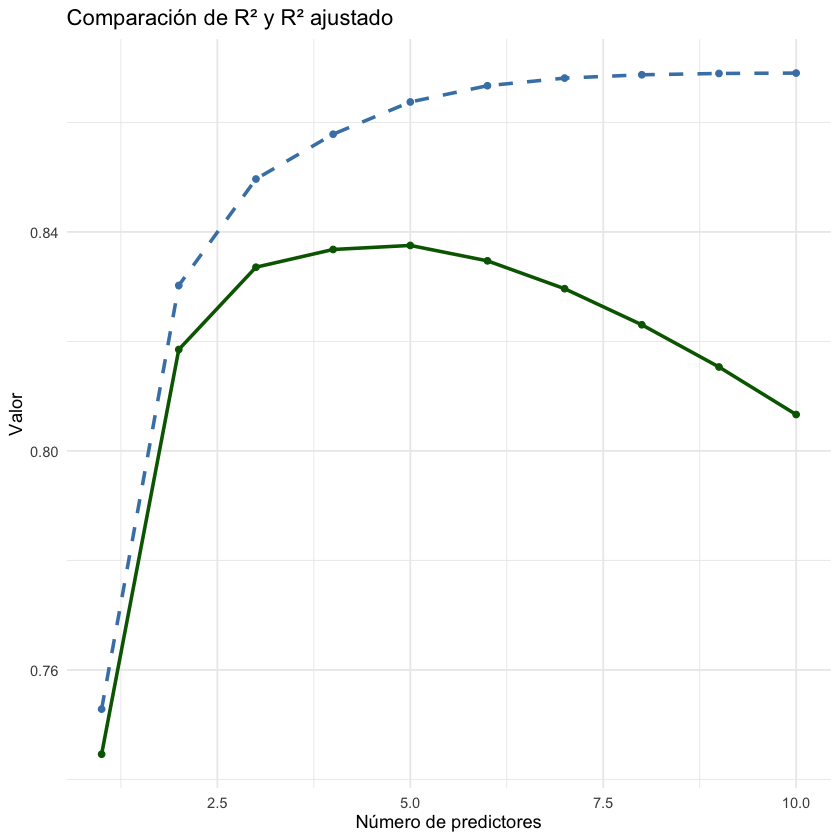

In [5]:
library(leaps)
library(ggplot2)

data(mtcars)

# Selección de subconjuntos usando regresión exhaustiva
reg <- regsubsets(mpg ~ ., data = mtcars, nvmax = 10)
reg_summary <- summary(reg)

# Extraemos criterios
rsq <- reg_summary$rsq
adjr2 <- reg_summary$adjr2
bic <- reg_summary$bic

df <- data.frame(
  NumVars = 1:length(rsq),
  R2 = rsq,
  AdjR2 = adjr2,
  BIC = bic
)

# Gráfico de R2 y R2 ajustado
ggplot(df, aes(x = NumVars)) +
  geom_line(aes(y = R2), color = "steelblue", size = 1, linetype = "dashed") +
  geom_line(aes(y = AdjR2), color = "darkgreen", size = 1) +
  geom_point(aes(y = R2), color = "steelblue") +
  geom_point(aes(y = AdjR2), color = "darkgreen") +
  labs(
    title = "Comparación de R² y R² ajustado",
    x = "Número de predictores",
    y = "Valor"
  ) +
  theme_minimal()

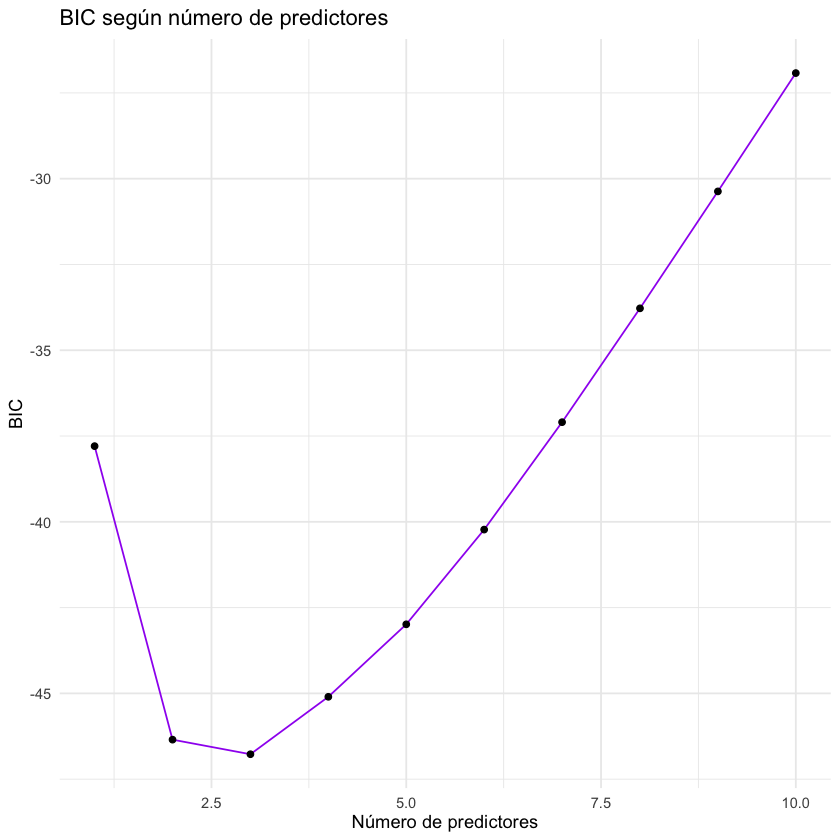

In [6]:
# Gráfico de BIC
ggplot(df, aes(x = NumVars, y = BIC)) +
  geom_line(color = "purple") +
  geom_point() +
  labs(
    title = "BIC según número de predictores",
    x = "Número de predictores",
    y = "BIC"
  ) +
  theme_minimal()

# 5. Metodologia de selección de variables

In [9]:
library(MASS)  # AIC
library(leaps) # regsubset
library(caret) # Cross validation

## 5.1 Mi modelo 

In [22]:
# fijo la semilla, para que los datos sean los mismos entre todos
set.seed(121)

In [23]:
# Simulación de datos:
n <- 100
x1 <- rnorm(n)
x2 <- rnorm(n)
x3 <- rnorm(n)
x4 <- rnorm(n)
x5 <- rnorm(n)

In [24]:
# Mi modelo
y <- 3 + 2*x1 - 1.5*x3 + rnorm(n)

In [25]:
# Mi conjunto de datos
datos <- data.frame(y, x1, x2, x3, x4, x5)
head(datos)

y          x1          x2         x3         x4           x5        
1  4.0494171  0.29726662  0.7180131 -0.6208357  0.940051871  0.4570097
2  3.7713688 -0.05765318  0.5039467 -0.5843628  0.004814981  0.3591500
3 -0.9384804 -1.09960818 -0.8094571 -0.1129651  1.782120738 -2.7436265
4  5.3501593  0.91354906  0.5679611 -0.6442557 -1.555727495 -0.3443095
5  6.4832421  1.40279533  0.6308496 -1.1523677 -1.354921539  0.3394463
6 -0.1478714 -0.86146727 -0.1622378  1.0569333  0.581387052  1.3101737

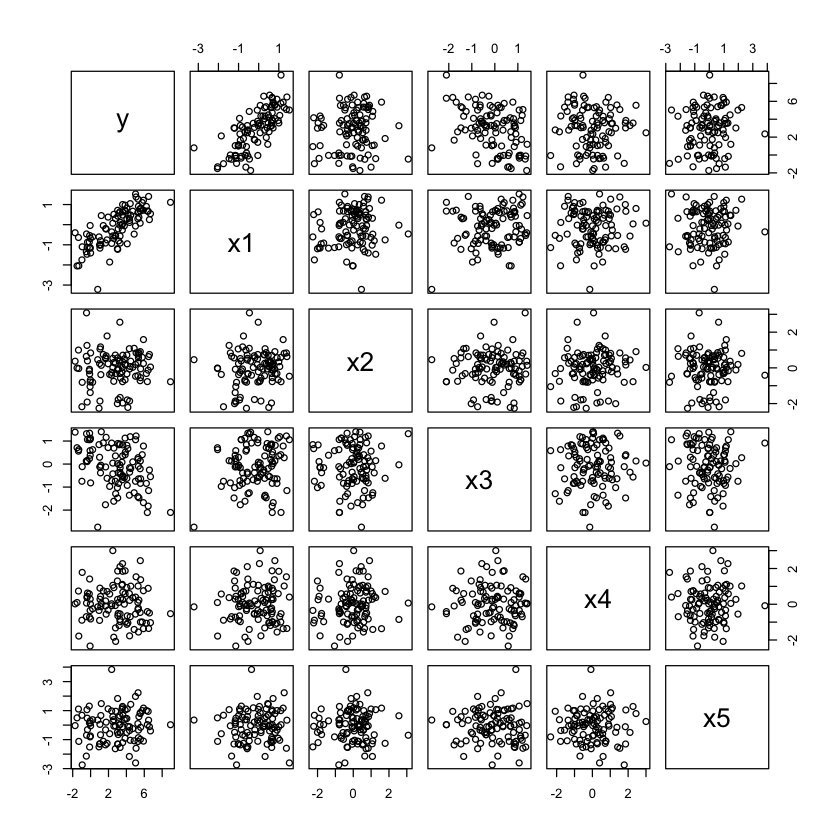

In [26]:
# Gráficos de dispersión
pairs(datos)

* Se observa que en principio tiene sentido plantear un modelo lineal

In [27]:
# Veo la correlación entre y con el resto de las variables
cor(datos)

y           x1         x2           x3          x4          x5          
y   1.00000000 0.75185483  0.050903762 -0.39672013 -0.04306710  0.097887548
x1  0.75185483 1.00000000  0.133199169  0.15484154  0.03296220  0.055503426
x2  0.05090376 0.13319917  1.000000000  0.01414219  0.11572097 -0.001204073
x3 -0.39672013 0.15484154  0.014142193  1.00000000  0.02283443 -0.052228017
x4 -0.04306710 0.03296220  0.115720965  0.02283443  1.00000000  0.015248789
x5  0.09788755 0.05550343 -0.001204073 -0.05222802  0.01524879  1.000000000

* Se observa que existe correlacion entre y-x1; y-x3
* No se observa correlacion entre "y" y las otras variables
* Tampoco se observa multicolinealidad

In [30]:
# Ajusto el modelo completo
ajuste_full<-lm(y~., data=datos)
summary(ajuste_full)


Call:
lm(formula = y ~ ., data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18537 -0.52067 -0.00311  0.57530  2.65662 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.06908    0.09560  32.103   <2e-16 ***
x1           2.13649    0.10701  19.965   <2e-16 ***
x2          -0.11167    0.09854  -1.133    0.260    
x3          -1.32160    0.10521 -12.561   <2e-16 ***
x4          -0.11849    0.09133  -1.297    0.198    
x5           0.05239    0.08745   0.599    0.551    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9418 on 94 degrees of freedom
Multiple R-squared:  0.8413,	Adjusted R-squared:  0.8329 
F-statistic: 99.66 on 5 and 94 DF,  p-value: < 2.2e-16


* Observo que las variables que son significativas son x1 y x3
* x2, x4 y x5 tienen p-valores donde me dicen que NO son significativos
* $R^2$ y $R^2$ ajustados están muy bien
* Sigo adelante... no tomo ninguna decisión

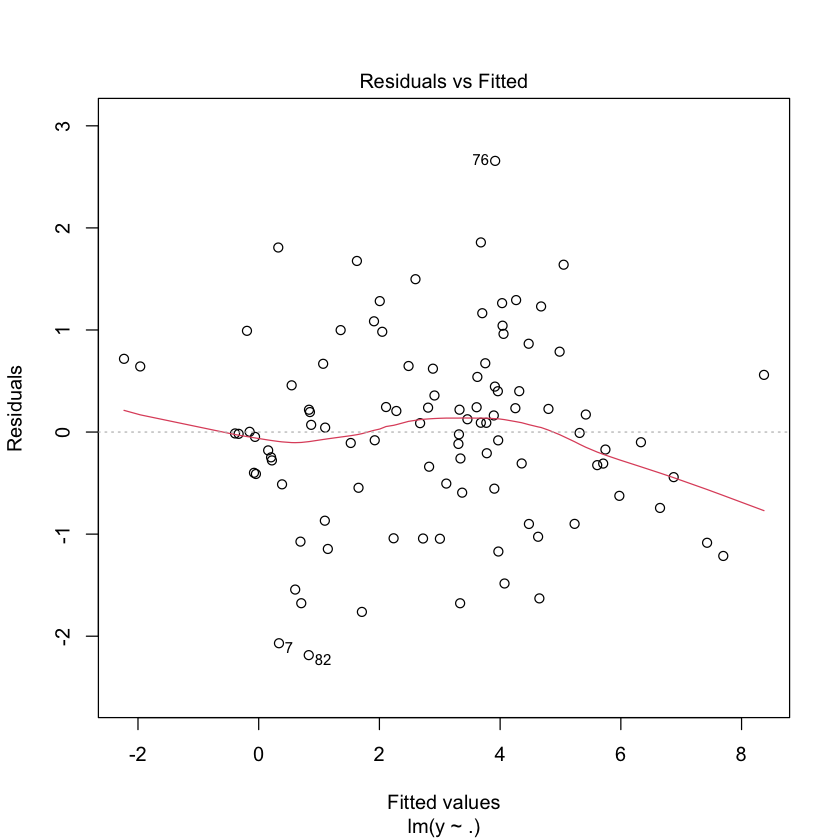

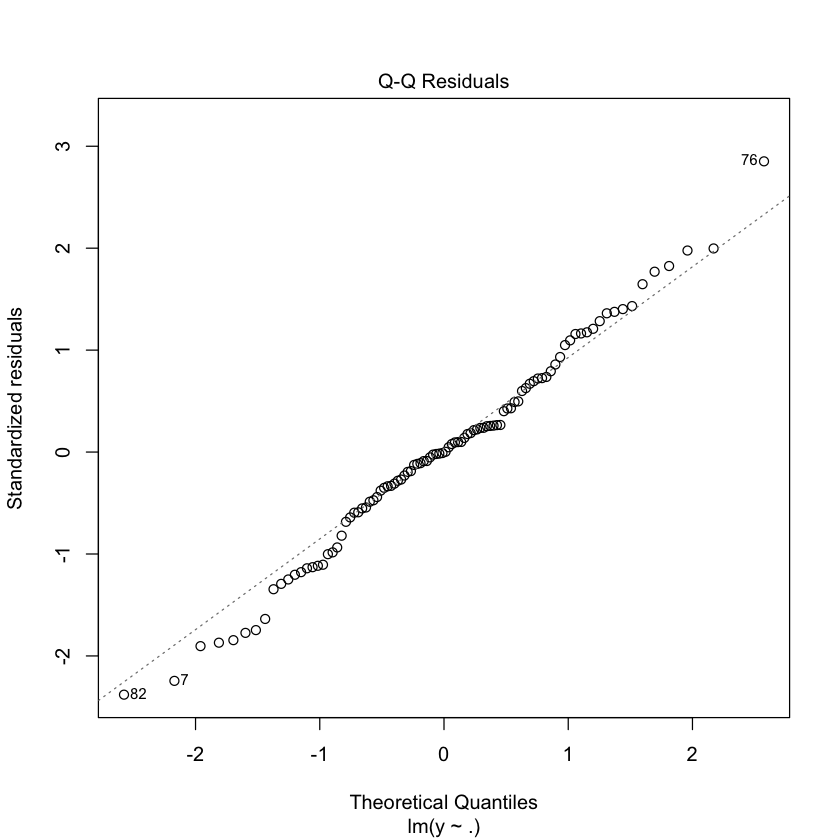

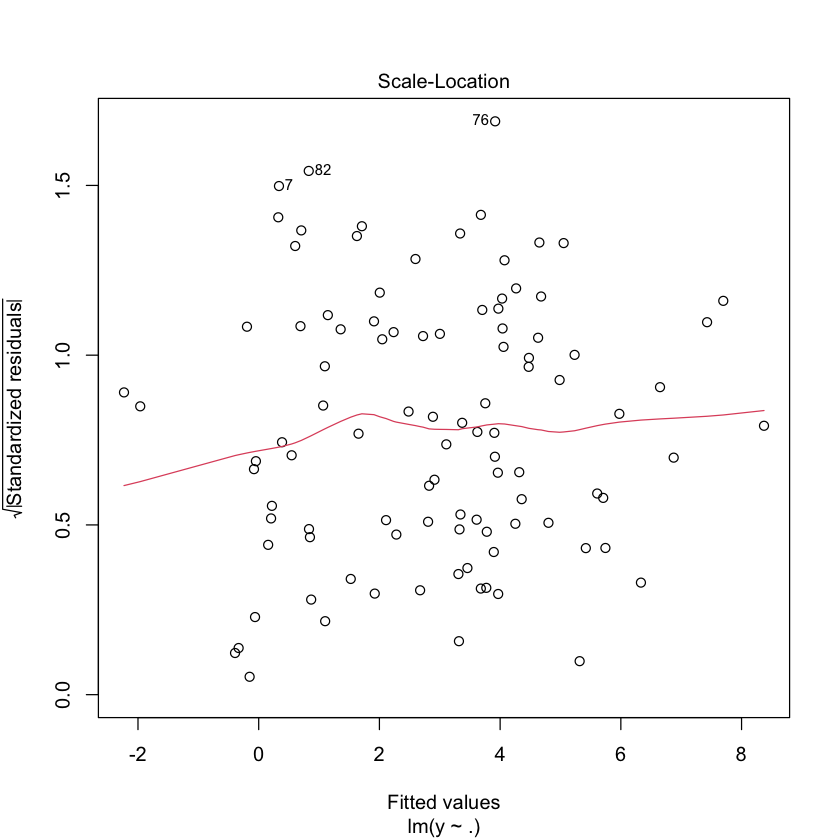

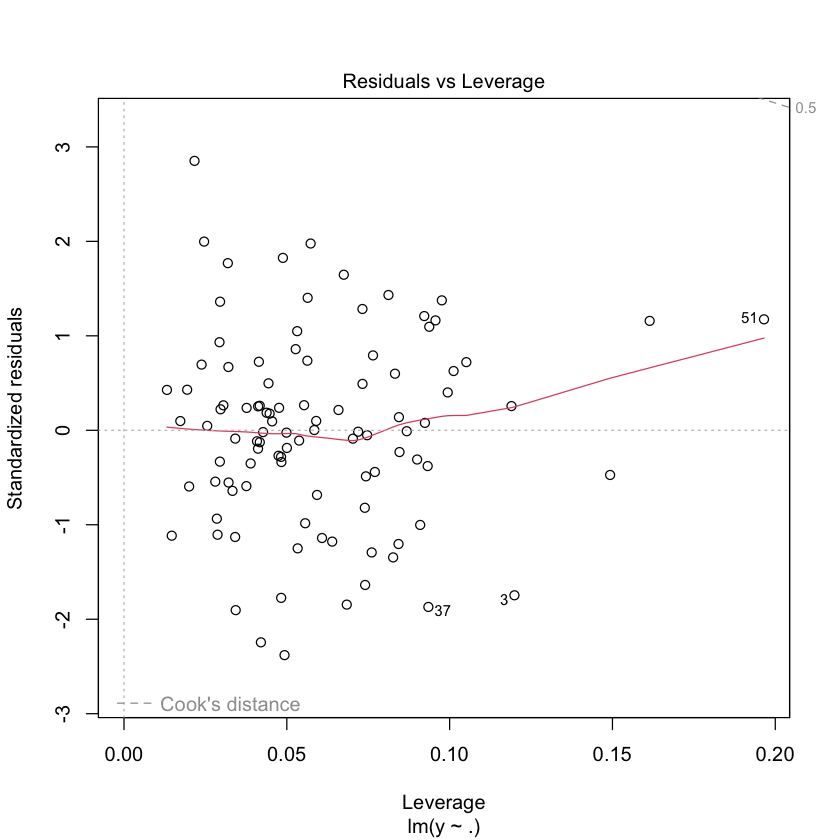

In [31]:
plot(ajuste_full)

* Gráfico 1: la curva roja me ayuda para ver si hay alguna tendencia, y en este caso no se ve estructura
* Gráfico 2: muy bien
* Gráfico 4: punto 51, alto leverage con residuo bajo. Es un punto de alto leverage BUENO

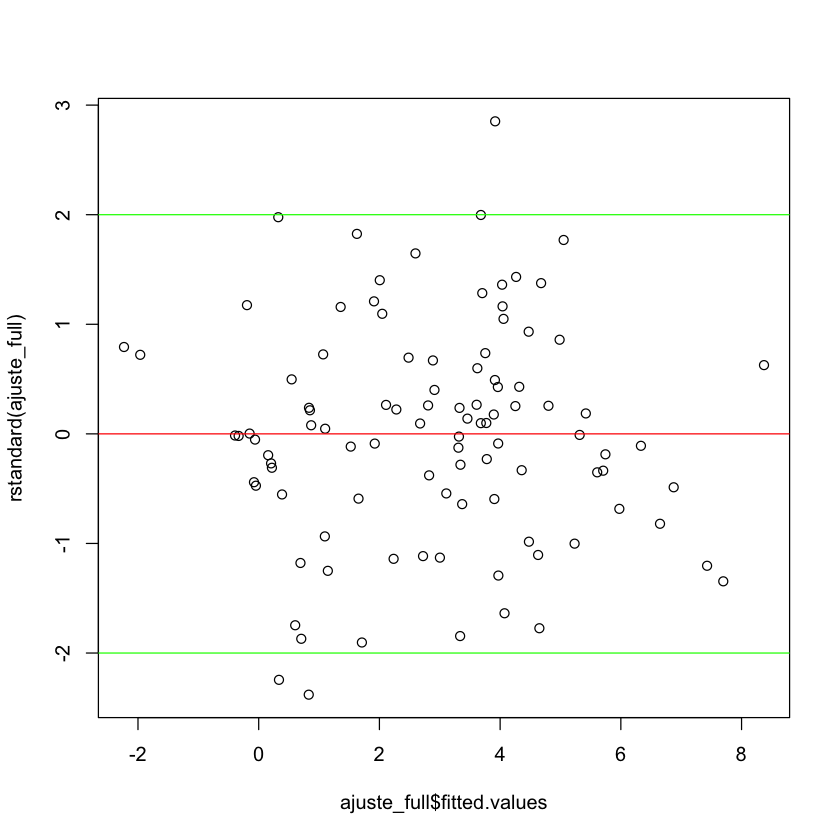

In [32]:
plot(ajuste_full$fitted.values,rstandard(ajuste_full))
abline(0,0,col="red")
abline(-2,0,col="green")
abline(2,0,col="green")

* Veo outlier de bajo leverage
* Termino diciendo cuando vea la distancia de Cook

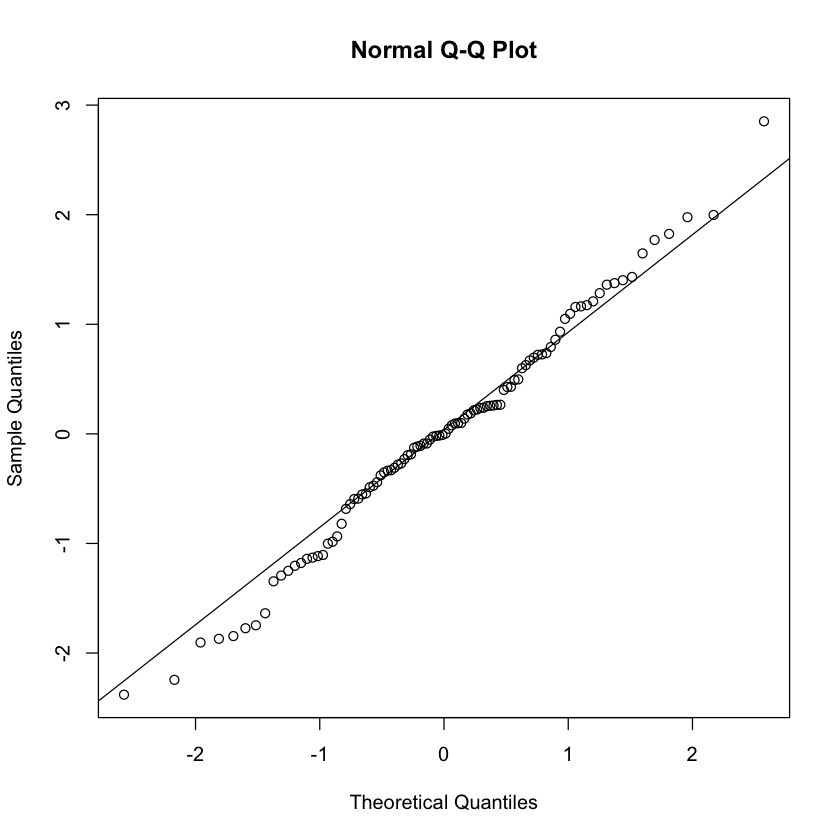

In [33]:
#normalidad de los residuos
qqnorm(rstandard(ajuste_full))
qqline(rstandard(ajuste_full))

* Esta muy bien!

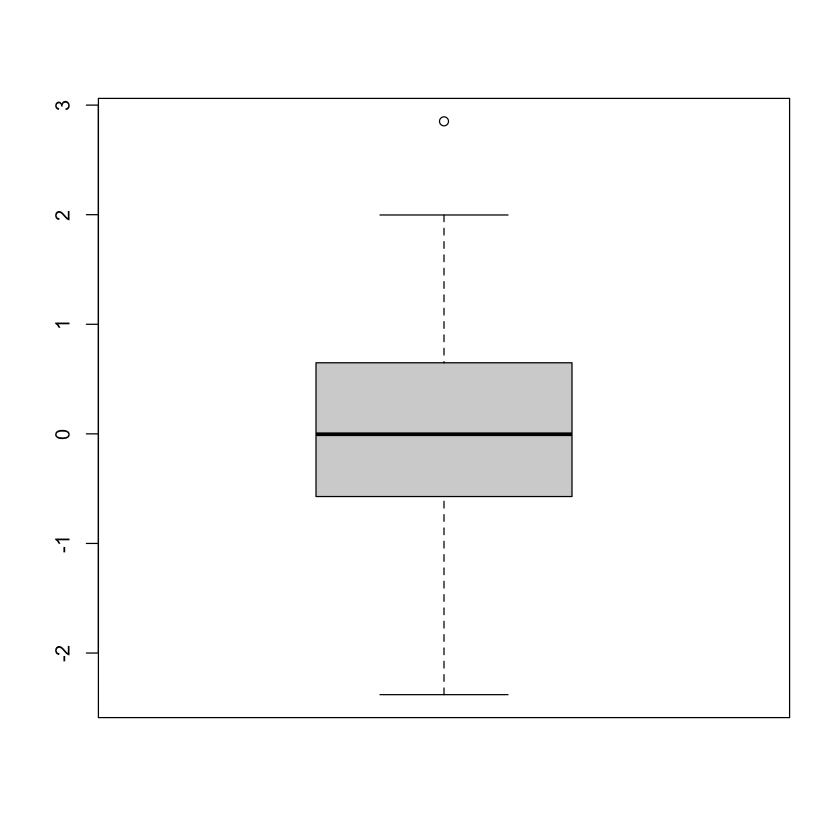

In [34]:
boxplot(rstandard(ajuste_full))

Warning message in plot.window(xlim, ylim, "", ...):
“"probabilty" es un parámetro gráfico inválido”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"probabilty" es un parámetro gráfico inválido”
Warning message in axis(1, ...):
“"probabilty" es un parámetro gráfico inválido”
Warning message in axis(2, at = yt, ...):
“"probabilty" es un parámetro gráfico inválido”


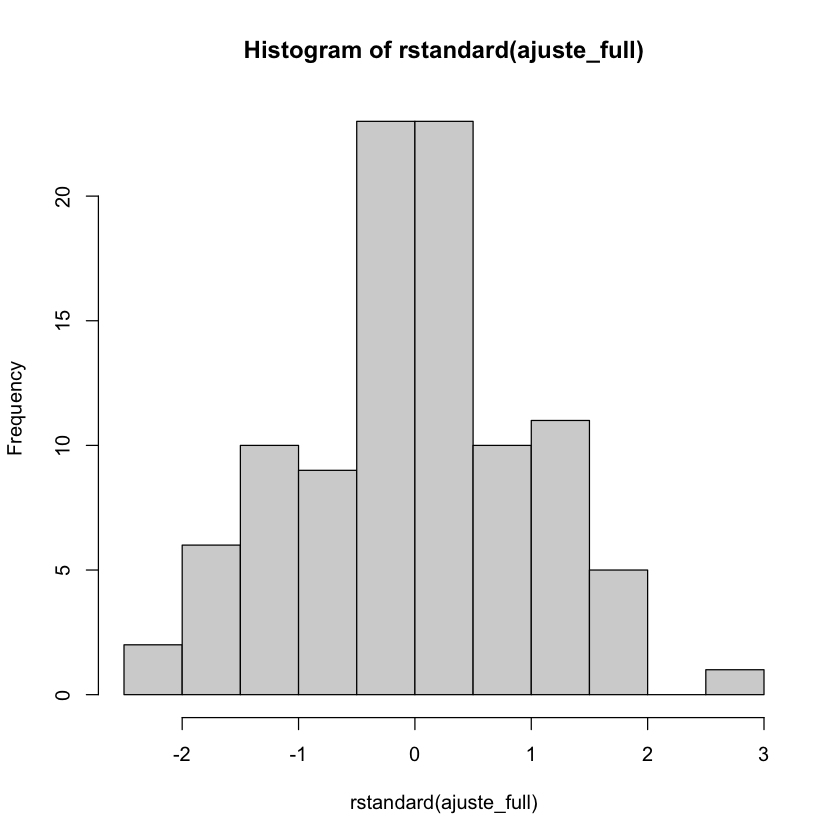

In [36]:
hist(rstandard(ajuste_full),probabilty=TRUE)

In [37]:
# Test de shapiro wilks para normalidad
# H_0: Los datos provienen de una distribución normal 
# H_a: Los datos no provienen de una distribución normal.
shapiro.test(rstandard(ajuste_full))


	Shapiro-Wilk normality test

data:  rstandard(ajuste_full)
W = 0.99134, p-value = 0.7715


* Si rechazo H_0 diria que mis datos no son normales
* Si no quiero rechazar H_0 cuanto deberia darme el p-valor? tendria que ser ALTO
* Que no rechace H_0 me está diciendo que no tengo suficiente evidencia para decir que los datos no son normales

In [38]:
## puntos influyentes: leverage y cook

# leverage
n <- nrow(datos)                 # tamaño de la muestra
p <- length(coef(ajuste_full))   # cant de parametros a estimar
leverage_umbral <- 2 * p / n

leverage <- hatvalues(ajuste_full)
alto.lev <- leverage[leverage > leverage_umbral]
alto.lev

51        69        86 
0.1965401 0.1492856 0.1614309

In [39]:
# Distancia de cook
cooks_umbral <- qf(0.5, p, n-p)
cooks <- cooks.distance(ajuste_full)

alto.cook<-cooks[cooks>cooks_umbral]
alto.cook

named numeric(0)

* En principio sigo adelante... no veo ninguna observación muy problemática

In [41]:
# Eleccion de variables

cant.var = length(ajuste_full$coefficients) - 1  # cantidad de variables
cant.var

# Ajuste de modelos con regsubsets
# por default hace el metodo exhaustivo. 
# Opciones: method = "backward" o method = "forward")

# metodo exhaustivo
ajuste <- regsubsets(y ~ ., data = datos, nvmax = cant.var) # para elegir un subconjunto de variables
resumen <- summary(ajuste)
resumen

[1] 5

Subset selection object
Call: regsubsets.formula(y ~ ., data = datos, nvmax = cant.var)
5 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
x5     FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         x1  x2  x3  x4  x5 
1  ( 1 ) "*" " " " " " " " "
2  ( 1 ) "*" " " "*" " " " "
3  ( 1 ) "*" " " "*" "*" " "
4  ( 1 ) "*" "*" "*" "*" " "
5  ( 1 ) "*" "*" "*" "*" "*"

In [42]:
# Crear tabla resumen
tabla <- data.frame(
  Variables = 1:cant.var,
  R2_ajustado = resumen$adjr2,
  BIC = resumen$bic
)

knitr::kable(tabla, digits = 3)



| Variables| R2_ajustado|      BIC|
|---------:|-----------:|--------:|
|         1|       0.561|  -74.096|
|         2|       0.832| -166.405|
|         3|       0.833| -163.901|
|         4|       0.834| -160.664|
|         5|       0.833| -156.439|

In [43]:
# Identificar el mejor modelo según cada criterio

mejor_R2 <- which.max(resumen$adjr2) # cant de variables que maximiza el r^2 ajustado
mejor_BIC <- which.min(resumen$bic)  # cant de variables que minimiza el BIC

cat("Mejor R2 ajustado →", mejor_R2, "variables\n")
cat("Mejor BIC         →", mejor_BIC, "variables\n")

Mejor R2 ajustado → 4 variables
Mejor BIC         → 2 variables


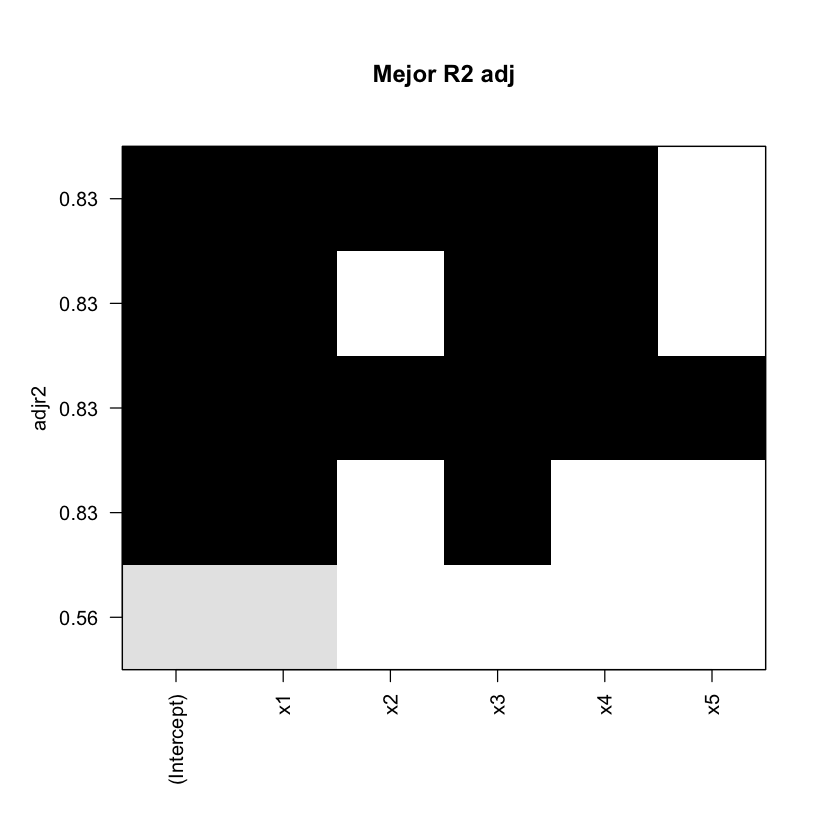

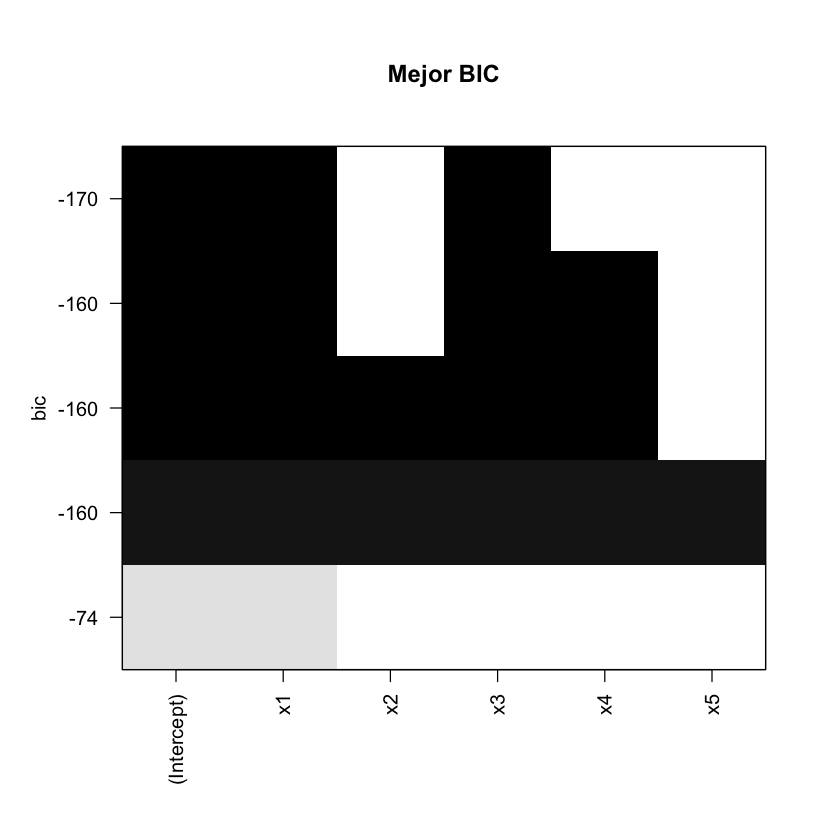

In [44]:
# Visualizar selección con gráfico
par(mfrow = c(1, 1))
plot(ajuste, scale = "adjr2", main = "Mejor R2 adj")
plot(ajuste, scale = "bic", main = "Mejor BIC")

* Miro los gráficos de arribo y mejor BIC eligió a intercept, x1 y x3   (cuadrados negros de arriba del gráfico)

## 5.2 Modelo BIC

In [45]:
# Ajustar el modelo elegido y compararlo
# Extraer nombres de variables del mejor modelo según BIC
# modelo BIC

variables_bic <- names(coef(ajuste, mejor_BIC))[-1]  # quitamos intercept
variables_bic

formula_bic <- as.formula(paste("y ~", paste(variables_bic, collapse = "+")))
formula_bic

modelo_bic <- lm(formula_bic, data = datos)
summary(modelo_bic)

[1] "x1" "x3"

y ~ x1 + x3


Call:
lm(formula = formula_bic, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32683 -0.57095  0.01834  0.66462  2.63430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.06252    0.09579   31.97   <2e-16 ***
x1           2.12031    0.10621   19.96   <2e-16 ***
x3          -1.32715    0.10536  -12.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9451 on 97 degrees of freedom
Multiple R-squared:  0.8351,	Adjusted R-squared:  0.8317 
F-statistic: 245.6 on 2 and 97 DF,  p-value: < 2.2e-16


* Veo que todas las variables son significativas

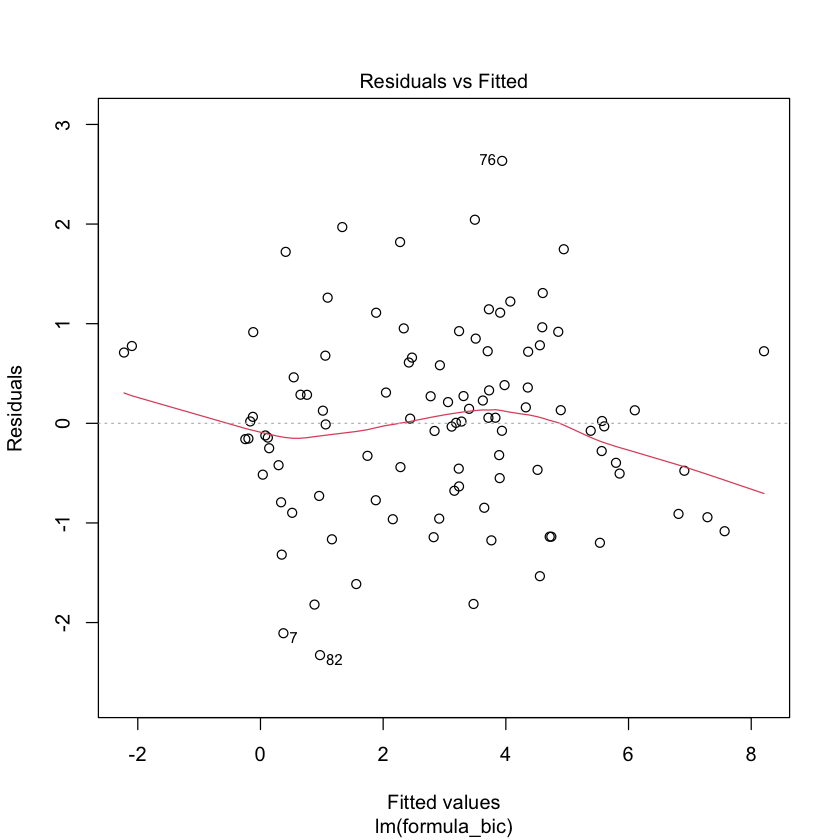

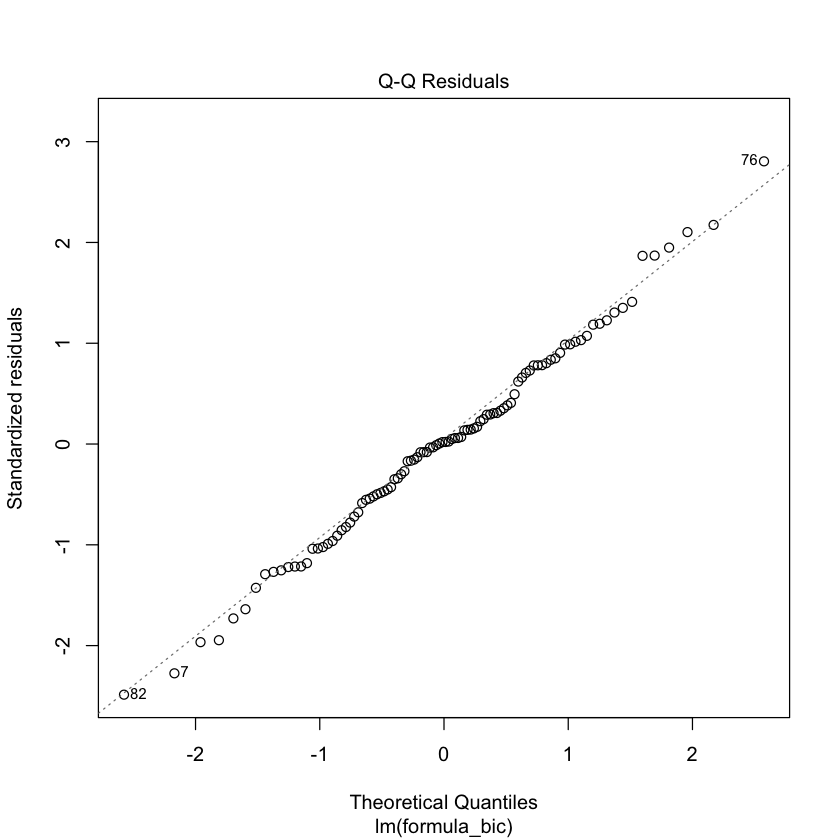

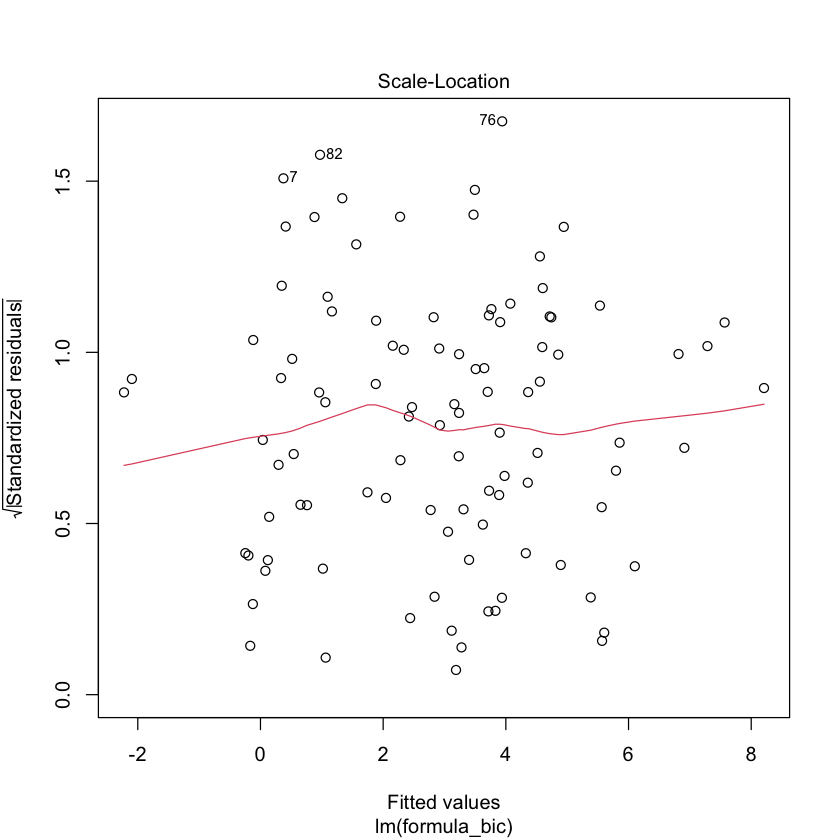

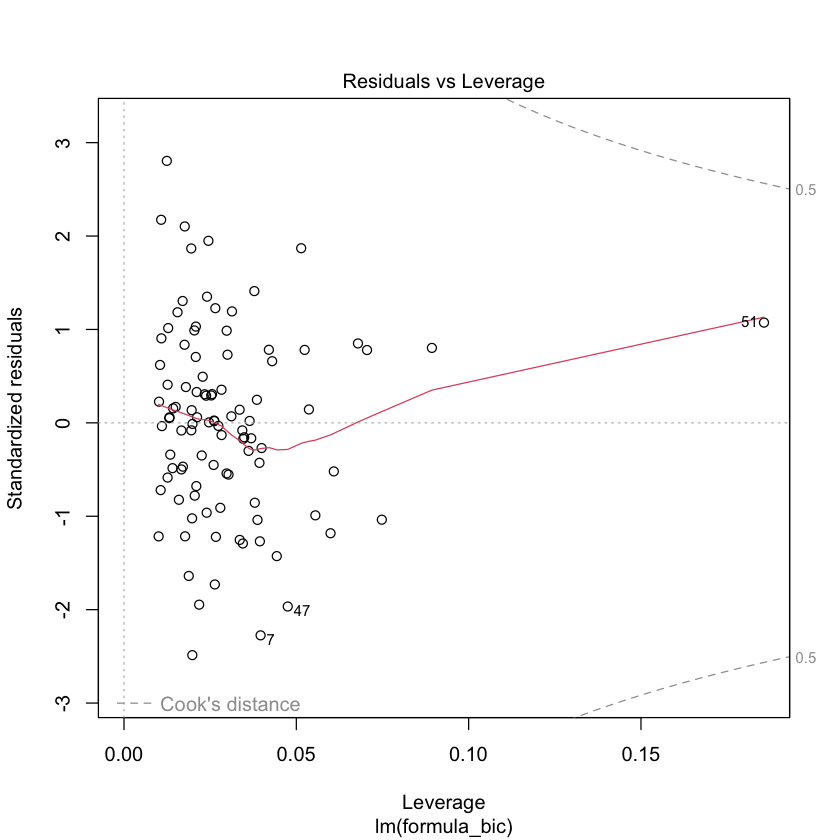

In [46]:
# Vuelvo a validar con el modelo BIC
plot(modelo_bic)

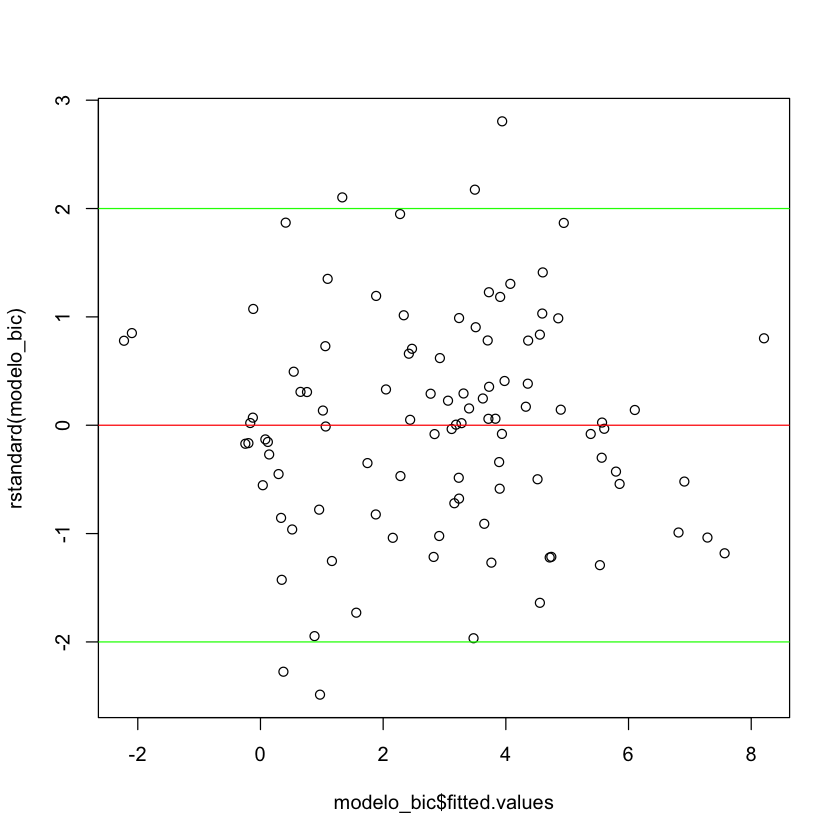

In [47]:
plot(modelo_bic$fitted.values, rstandard(modelo_bic))
abline(0, 0, col = "red")
abline(-2, 0, col = "green")
abline(2, 0, col = "green")

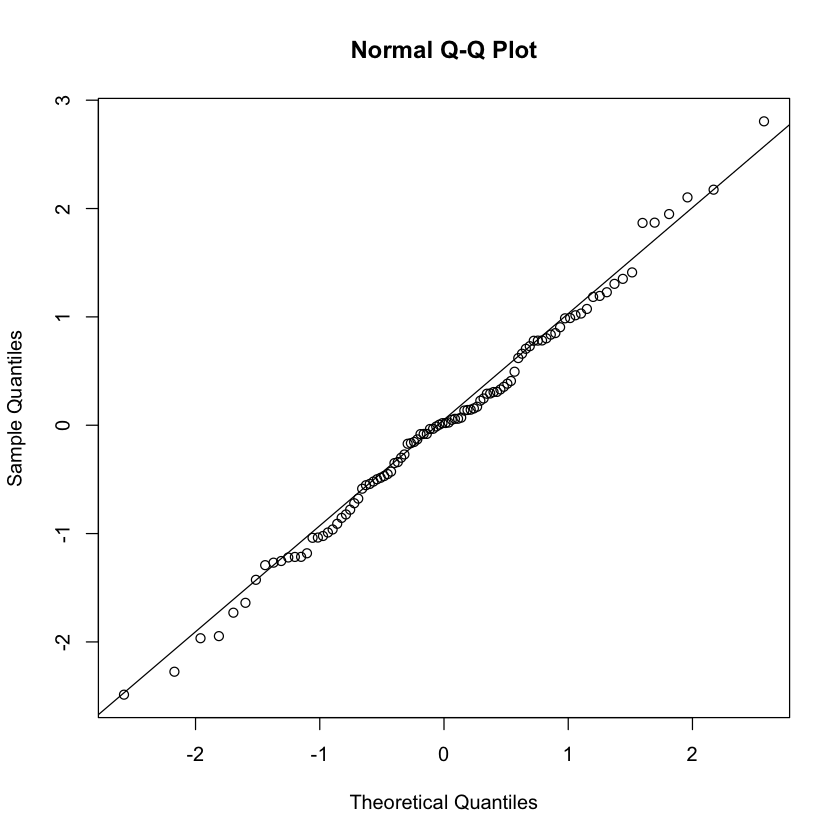

In [48]:
#normalidad de los residuos
qqnorm(rstandard(modelo_bic))
qqline(rstandard(modelo_bic))

In [49]:
# Test de shapiro wilks para normalidad
# H_0: Los datos provienen de una distribución normal 
# H_a: Los datos no provienen de una distribución normal.
shapiro.test(rstandard(modelo_bic))


	Shapiro-Wilk normality test

data:  rstandard(modelo_bic)
W = 0.99373, p-value = 0.9278


In [50]:
## puntos influyentes: leverage y cook

# leverage
n <- nrow(datos)
p <- length(coef(modelo_bic)) 
leverage_umbral <- 2 * p / n

leverage <- hatvalues(modelo_bic)
alto.lev <- leverage[leverage > leverage_umbral]
alto.lev

36         46         51         57         83         87 
0.07480542 0.07051309 0.18569462 0.06788223 0.06088219 0.08933877

In [51]:
# Distancia de cook
cooks_umbral <- qf(0.5, p, n-p)
cooks <- cooks.distance(modelo_bic)

alto.cook <- cooks[cooks > cooks_umbral]
alto.cook

named numeric(0)

## 5.3 Modelo $R^2$

In [52]:
variables_R2 <- names(coef(ajuste, mejor_R2))[-1]  # quitamos intercept
variables_R2

formula_R2 <- as.formula(paste("y ~", paste(variables_R2, collapse = "+")))
formula_R2

modelo_R2 <- lm(formula_R2, data = datos)
summary(modelo_R2)

[1] "x1" "x2" "x3" "x4"

y ~ x1 + x2 + x3 + x4


Call:
lm(formula = formula_R2, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.12020 -0.52361  0.02778  0.56279  2.65199 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.06681    0.09520  32.213   <2e-16 ***
x1           2.14064    0.10643  20.114   <2e-16 ***
x2          -0.11230    0.09820  -1.144    0.256    
x3          -1.32550    0.10466 -12.665   <2e-16 ***
x4          -0.11763    0.09101  -1.292    0.199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9386 on 95 degrees of freedom
Multiple R-squared:  0.8407,	Adjusted R-squared:  0.834 
F-statistic: 125.3 on 4 and 95 DF,  p-value: < 2.2e-16


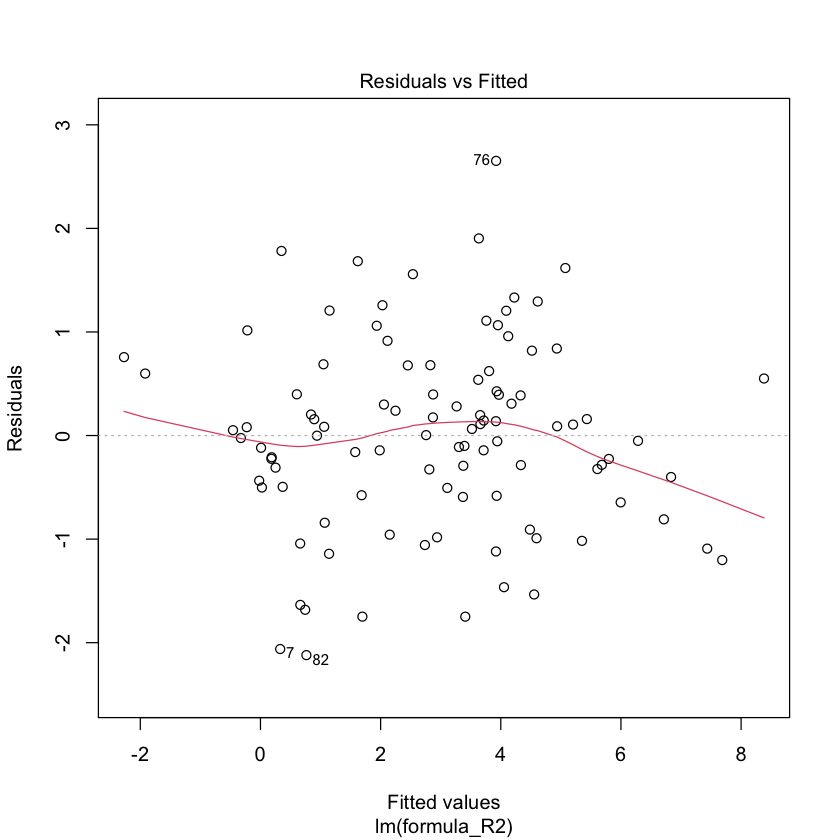

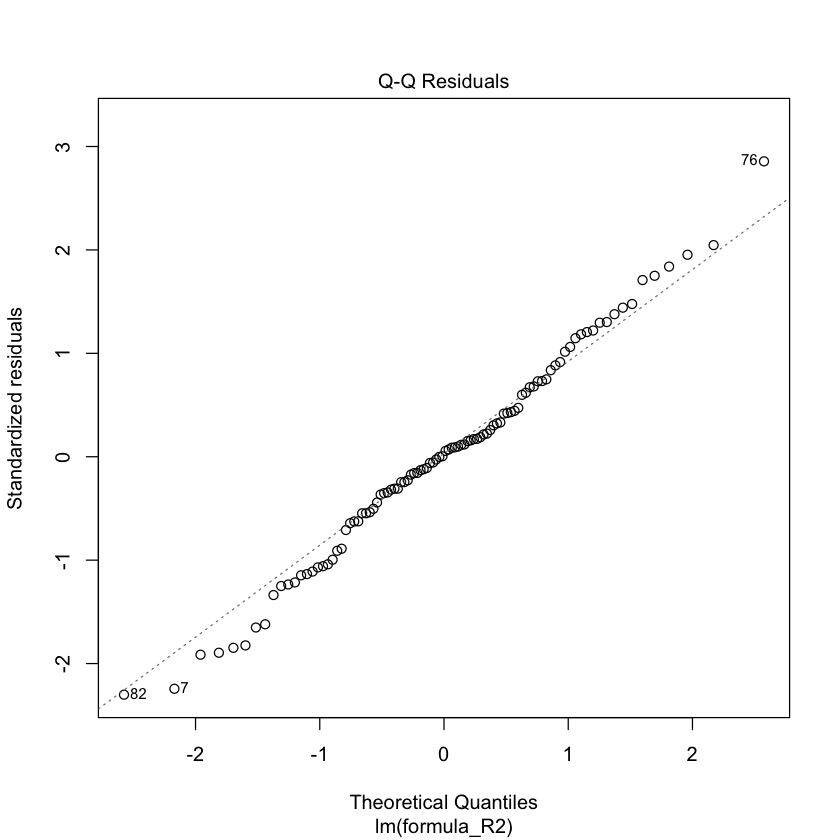

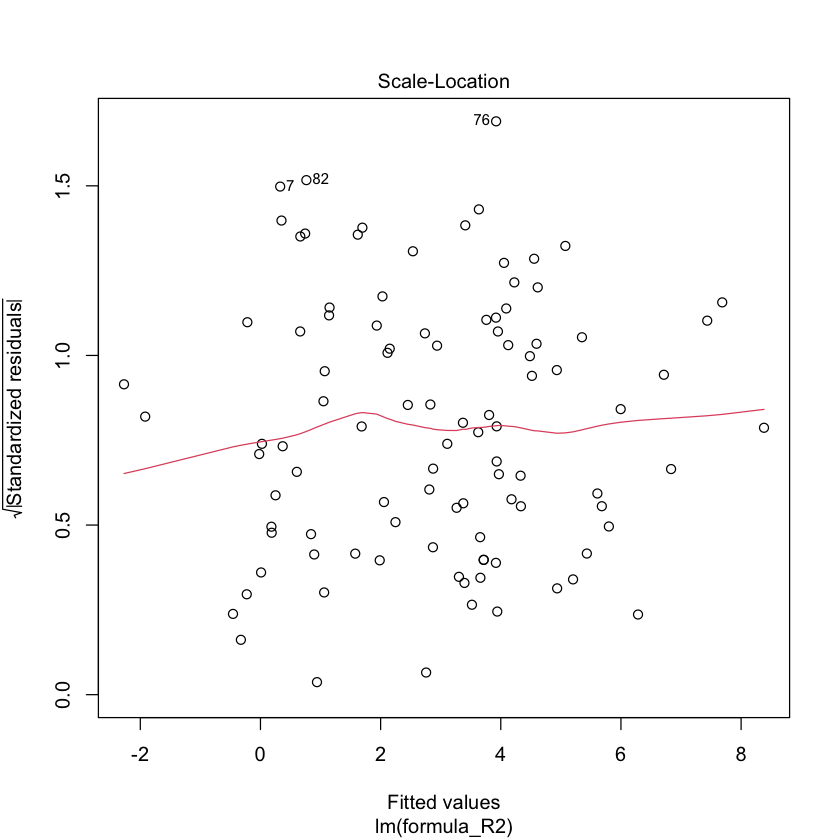

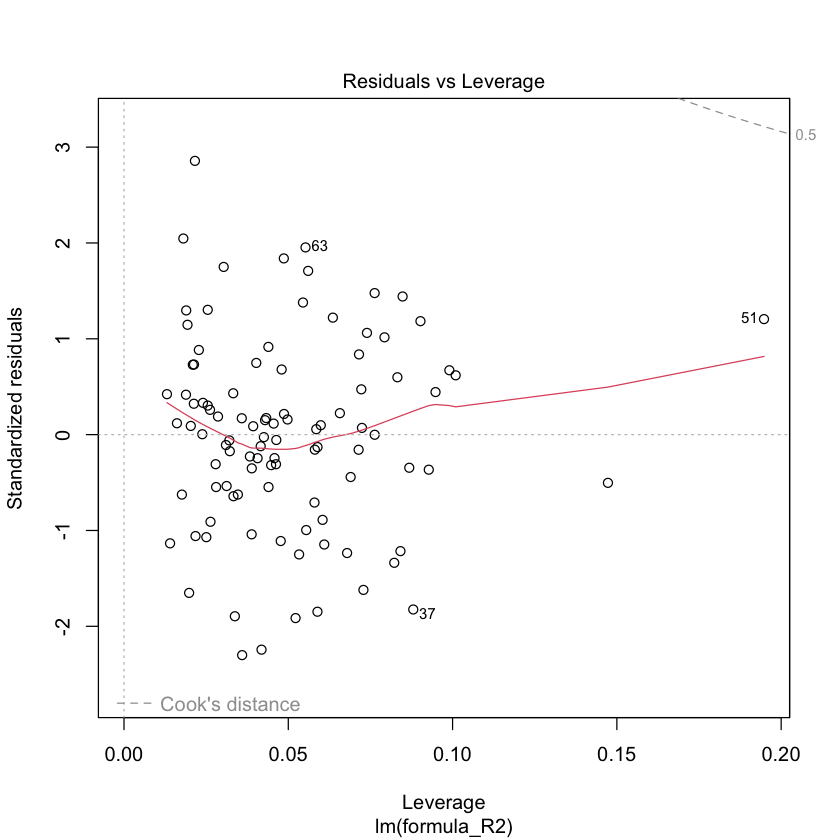

In [53]:
plot(modelo_R2)

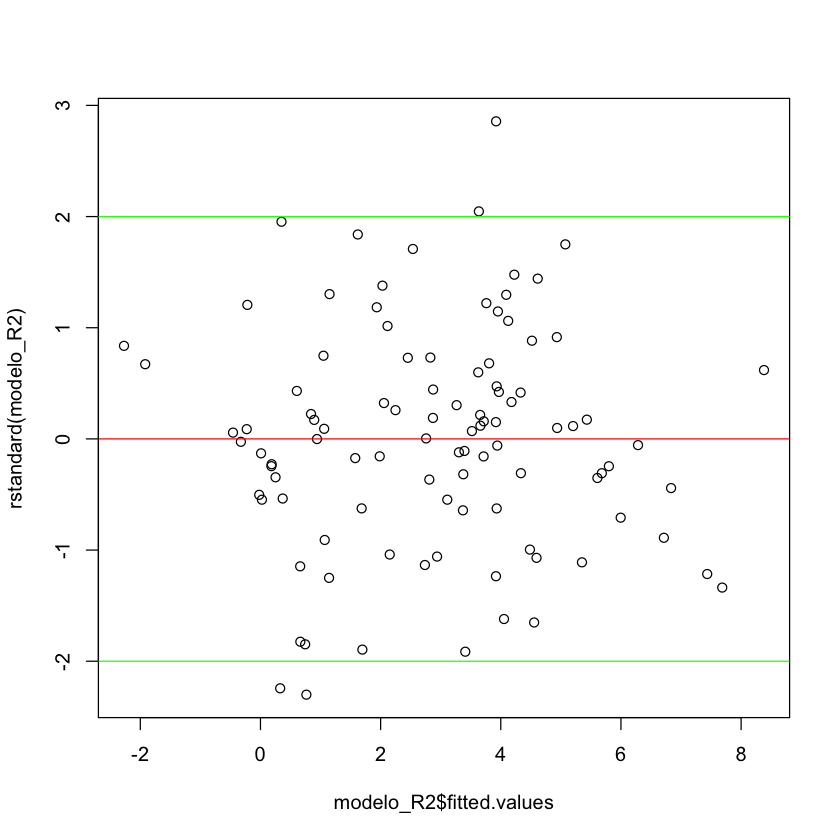

In [54]:
plot(modelo_R2$fitted.values,rstandard(modelo_R2))
abline(0,0,col="red")
abline(-2,0,col="green")
abline(2,0,col="green")

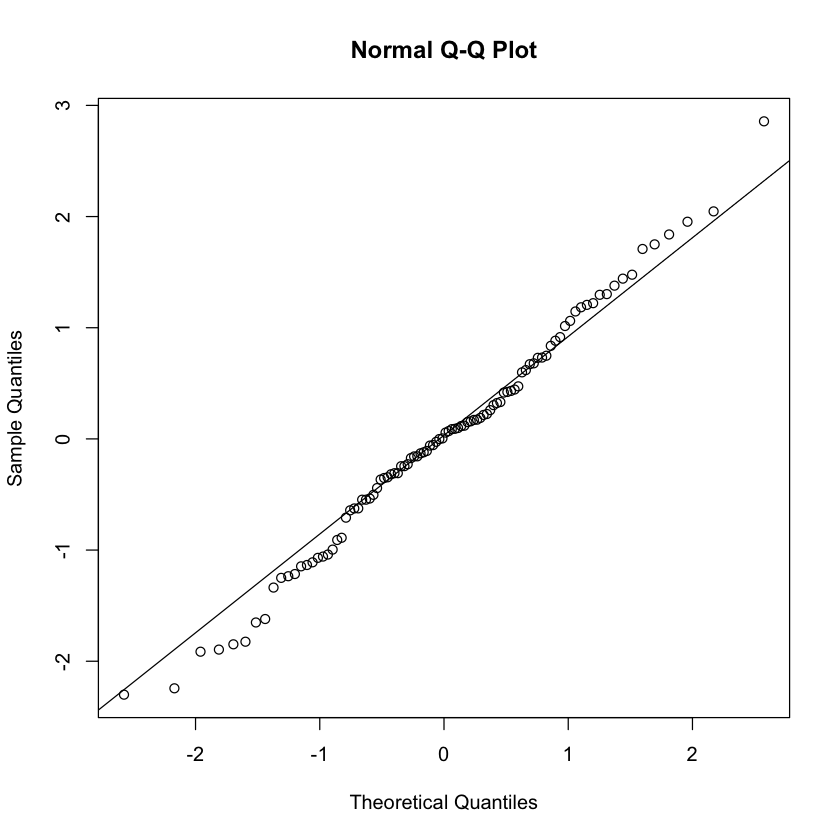

In [55]:
#normalidad de los residuos
qqnorm(rstandard(modelo_R2))
qqline(rstandard(modelo_R2))

In [56]:
# Test de shapiro wilks para normalidad
# H_0: Los datos provienen de una distribución normal 
# H_a: Los datos no provienen de una distribución normal.
shapiro.test(rstandard(modelo_R2))


	Shapiro-Wilk normality test

data:  rstandard(modelo_R2)
W = 0.99175, p-value = 0.8028


In [57]:
## puntos influyentes

# leverage
n<-nrow(datos)
p <- length(coef(modelo_R2)) 
leverage_umbral <- 2 * p / n

leverage<-hatvalues(modelo_R2)
alto.lev<-leverage[leverage>leverage_umbral]
alto.lev

51        69        87 
0.1947771 0.1472808 0.1009462

In [58]:
# Distancia de cook
cooks_umbral <- qf(0.5,p,n-p)
cooks <- cooks.distance(modelo_R2)

alto.cook<-cooks[cooks>cooks_umbral]
alto.cook

named numeric(0)

## 5.4 Comparo summary

In [59]:
summary(modelo_bic)
summary(modelo_R2)
summary(ajuste_full)


Call:
lm(formula = formula_bic, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32683 -0.57095  0.01834  0.66462  2.63430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.06252    0.09579   31.97   <2e-16 ***
x1           2.12031    0.10621   19.96   <2e-16 ***
x3          -1.32715    0.10536  -12.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9451 on 97 degrees of freedom
Multiple R-squared:  0.8351,	Adjusted R-squared:  0.8317 
F-statistic: 245.6 on 2 and 97 DF,  p-value: < 2.2e-16



Call:
lm(formula = formula_R2, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.12020 -0.52361  0.02778  0.56279  2.65199 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.06681    0.09520  32.213   <2e-16 ***
x1           2.14064    0.10643  20.114   <2e-16 ***
x2          -0.11230    0.09820  -1.144    0.256    
x3          -1.32550    0.10466 -12.665   <2e-16 ***
x4          -0.11763    0.09101  -1.292    0.199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9386 on 95 degrees of freedom
Multiple R-squared:  0.8407,	Adjusted R-squared:  0.834 
F-statistic: 125.3 on 4 and 95 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ ., data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18537 -0.52067 -0.00311  0.57530  2.65662 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.06908    0.09560  32.103   <2e-16 ***
x1           2.13649    0.10701  19.965   <2e-16 ***
x2          -0.11167    0.09854  -1.133    0.260    
x3          -1.32160    0.10521 -12.561   <2e-16 ***
x4          -0.11849    0.09133  -1.297    0.198    
x5           0.05239    0.08745   0.599    0.551    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9418 on 94 degrees of freedom
Multiple R-squared:  0.8413,	Adjusted R-squared:  0.8329 
F-statistic: 99.66 on 5 and 94 DF,  p-value: < 2.2e-16


* Analizando los 3 modelos, me quedaria con el BIC

# 6 Metodologia AKAIKE

In [65]:
# Simulación de datos
set.seed(121)
n <- 100
x1 <- rnorm(n)
x2 <- rnorm(n)
x3 <- rnorm(n)
x4 <- rnorm(n)
x5 <- rnorm(n)
y <- 3 + 2*x1 - 1.5*x3 + rnorm(n)
datos <- data.frame(y, x1, x2, x3, x4, x5)

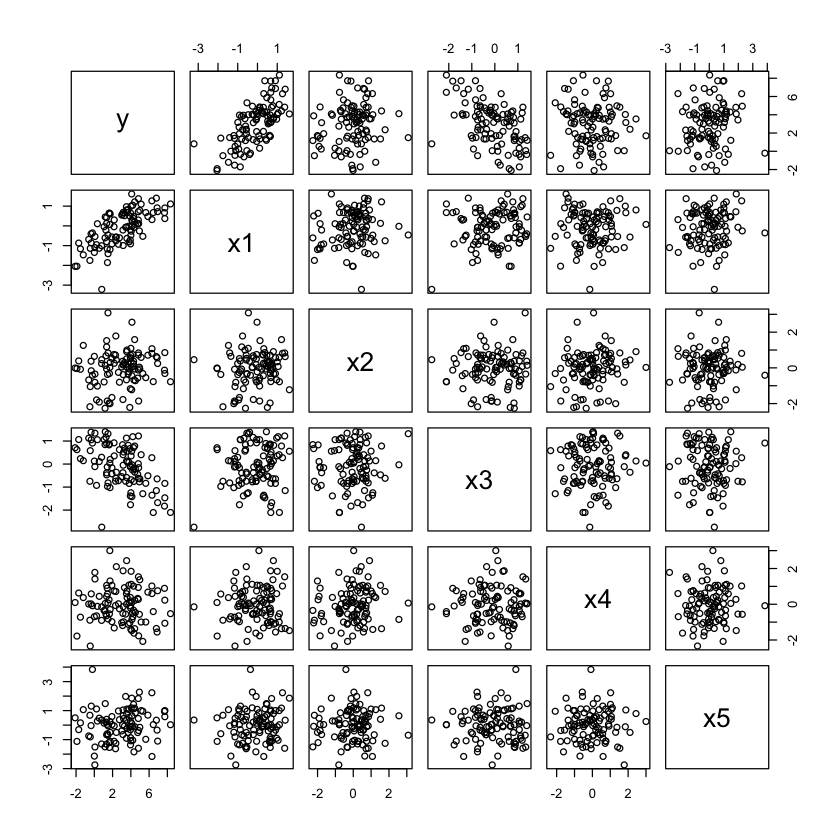

In [66]:
pairs(datos)

In [67]:
cor(datos)

y           x1         x2         x3          x4          x5         
y   1.00000000 0.68094565 0.13794526 -0.49163302 -0.03804527  0.13787301
x1  0.68094565 1.00000000 0.12677477  0.13882501  0.01252159  0.10684521
x2  0.13794526 0.12677477 1.00000000  0.01286705  0.15473221  0.01549555
x3 -0.49163302 0.13882501 0.01286705  1.00000000  0.02058962 -0.02322037
x4 -0.03804527 0.01252159 0.15473221  0.02058962  1.00000000  0.02340255
x5  0.13787301 0.10684521 0.01549555 -0.02322037  0.02340255  1.00000000

In [68]:
# se observa que existe correlacion entre y-x1; y-x3
# no se observa correlacion entre "y" y las otras variables
# tampoco se observa multicolinealidad

ajuste_full<-lm(y~., data=datos)

summary(ajuste_full)


Call:
lm(formula = y ~ ., data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.76509 -0.56821  0.05903  0.72154  2.49574 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.01788    0.10203  29.579   <2e-16 ***
x1           1.96252    0.11685  16.795   <2e-16 ***
x2           0.13317    0.10515   1.267    0.208    
x3          -1.52784    0.11353 -13.457   <2e-16 ***
x4          -0.10293    0.10132  -1.016    0.312    
x5           0.09356    0.09391   0.996    0.322    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.01 on 94 degrees of freedom
Multiple R-squared:  0.8202,	Adjusted R-squared:  0.8107 
F-statistic: 85.78 on 5 and 94 DF,  p-value: < 2.2e-16


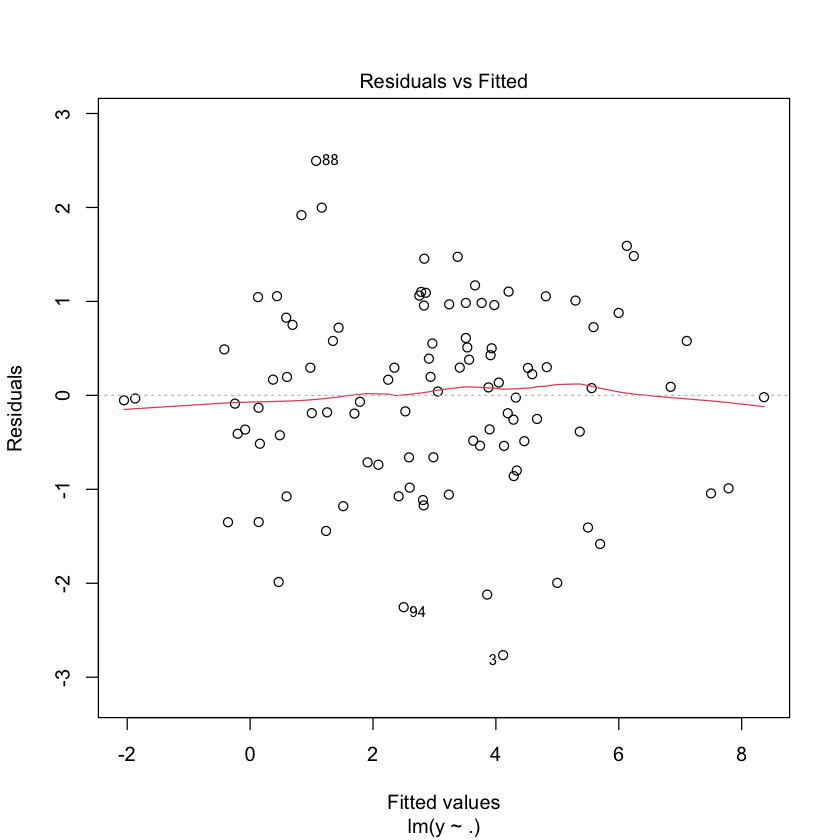

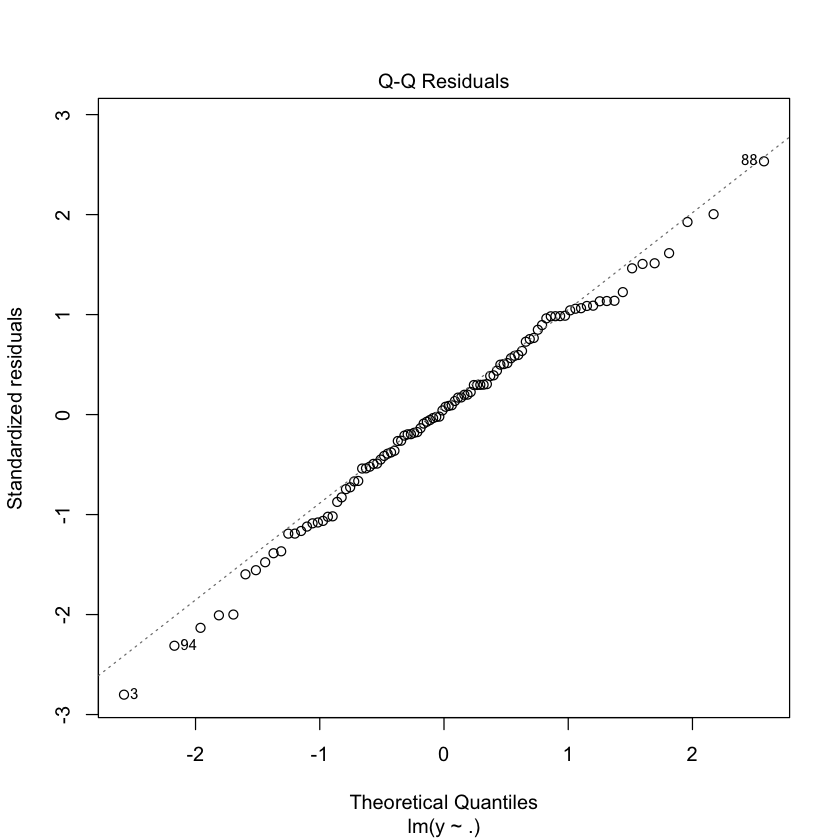

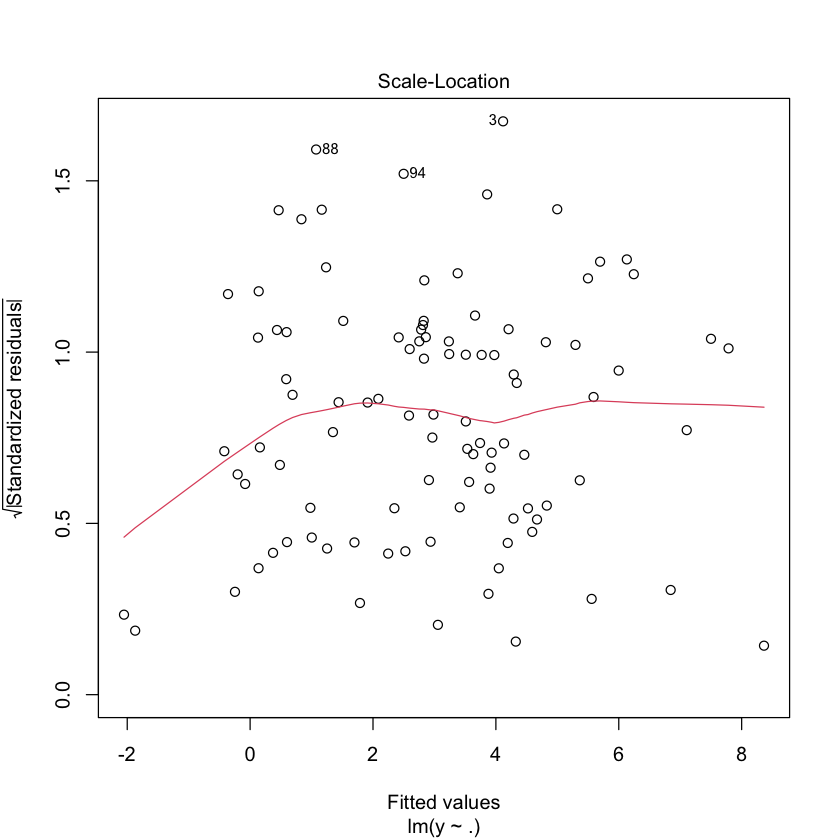

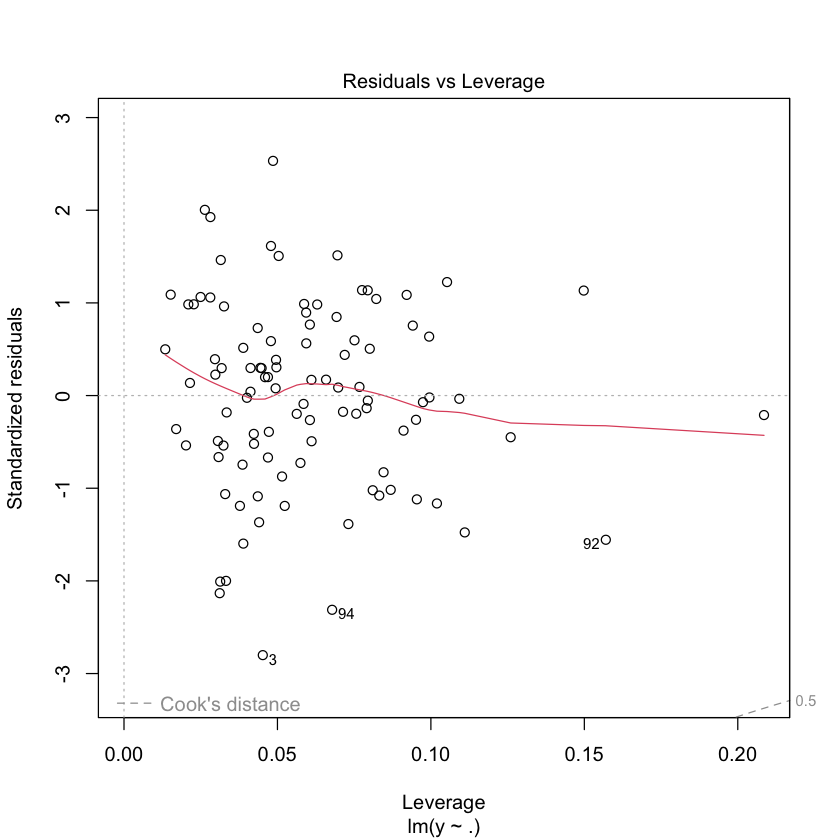

In [69]:
plot(ajuste_full)

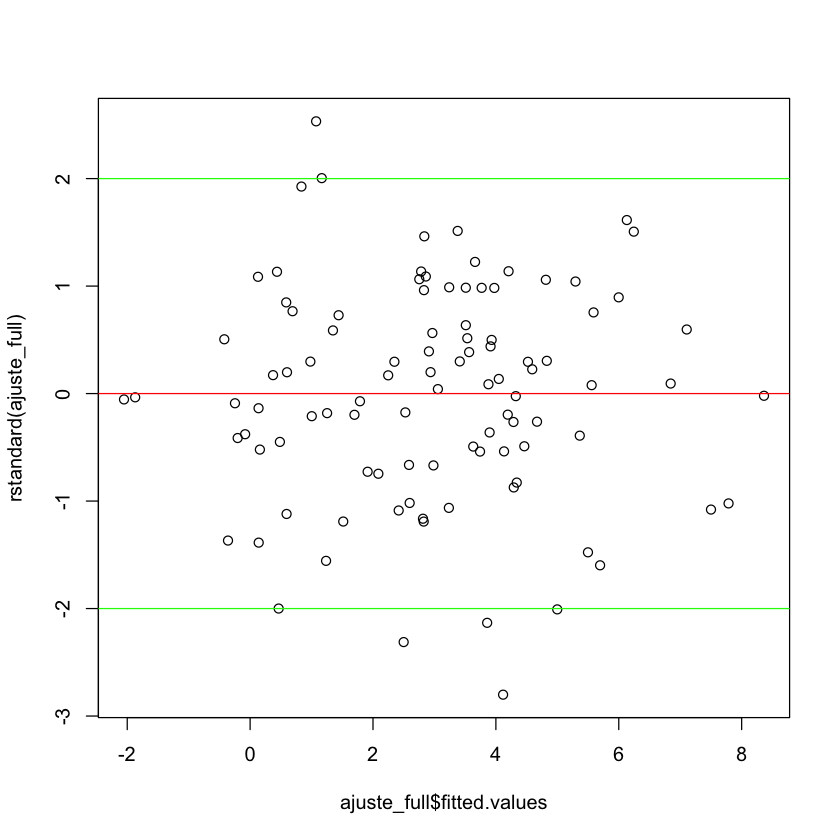

In [70]:
plot(ajuste_full$fitted.values,rstandard(ajuste_full))
abline(0,0,col="red")
abline(-2,0,col="green")
abline(2,0,col="green")

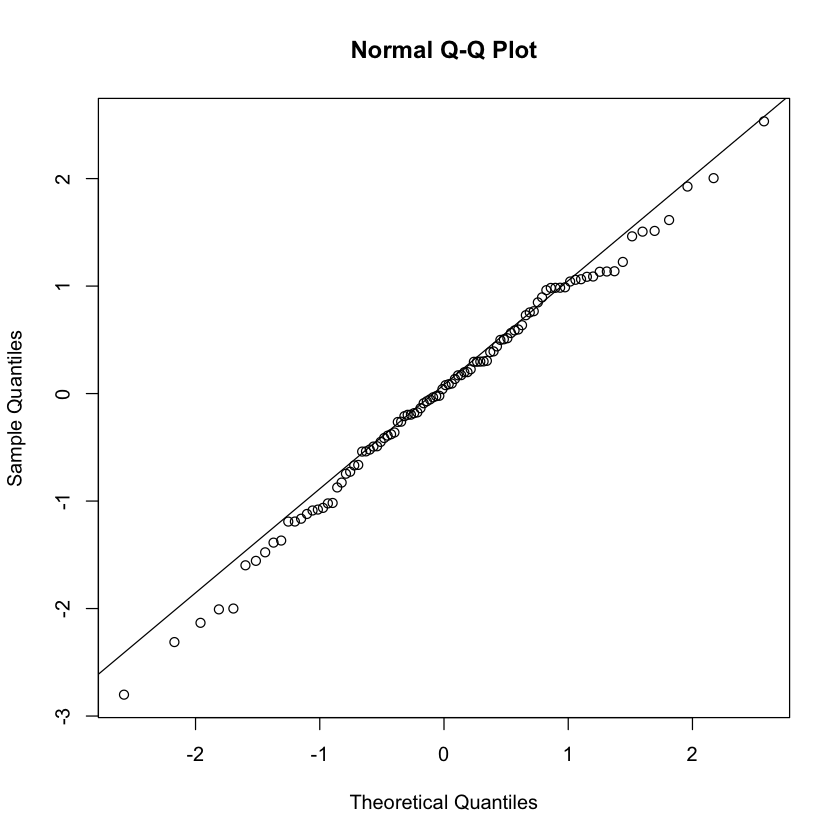

In [71]:
#normalidad de los residuos
qqnorm(rstandard(ajuste_full))
qqline(rstandard(ajuste_full))

In [72]:
# Test de shapiro wilks para normalidad
# H_0: Los datos provienen de una distribución normal 
# H_a: Los datos no provienen de una distribución normal.
shapiro.test(rstandard(ajuste_full))


	Shapiro-Wilk normality test

data:  rstandard(ajuste_full)
W = 0.99218, p-value = 0.834


In [73]:
## puntos influyentes

# leverage
n<-nrow(datos)
p <- length(coef(ajuste_full)) 
leverage_umbral <- 2 * p / n

leverage<-hatvalues(ajuste_full)
alto.lev<-leverage[leverage>leverage_umbral]
alto.lev

9        57        75        92 
0.1259931 0.2085441 0.1498005 0.1570031

In [74]:
# Distancia de cook
cooks_umbral <- qf(0.5,p,n-p)
cooks <- cooks.distance(ajuste_full)

alto.cook<-cooks[cooks>cooks_umbral]
alto.cook

named numeric(0)

In [75]:
# Eleccion de variables

# cantidad de variables

cant.var=length(ajuste_full$coefficients)-1
cant.var

# AIC

# Ajusto con solo el intercept
ajuste_nulo <- lm(y ~ 1, data = datos)

#Ajuste modelo completo
ajuste_full <- lm(y ~ ., data = datos)

[1] 5

In [76]:
# Para ver el proceso de entrada de la variable

step_model.Forw<-stepAIC(ajuste_nulo, 
                         scope = list(lower = ajuste_nulo, upper = ajuste_full),
                         direction = "forward")

# Si no quiero ver el proceso de entrada de la variable
step_model.Forw<-stepAIC(ajuste_nulo, 
                         scope = list(lower = ajuste_nulo, upper = ajuste_full),
                         direction = "forward", trace = FALSE)
summary(step_model.Forw)

Start:  AIC=169.46
y ~ 1

       Df Sum of Sq    RSS    AIC
+ x1    1   247.454 286.21 109.16
+ x3    1   128.989 404.68 143.79
<none>              533.67 169.46
+ x2    1    10.155 523.51 169.54
+ x5    1    10.144 523.52 169.54
+ x4    1     0.772 532.89 171.31

Step:  AIC=109.16
y ~ x1

       Df Sum of Sq     RSS     AIC
+ x3    1   186.966  99.247   5.244
<none>              286.212 109.156
+ x5    1     2.289 283.923 110.353
+ x2    1     1.445 284.767 110.650
+ x4    1     1.158 285.055 110.751

Step:  AIC=5.24
y ~ x1 + x3

       Df Sum of Sq    RSS    AIC
<none>              99.247 5.2438
+ x2    1   1.29116 97.956 5.9344
+ x5    1   0.97072 98.276 6.2609
+ x4    1   0.66552 98.581 6.5710



Call:
lm(formula = y ~ x1 + x3, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64274 -0.60218  0.03488  0.59600  2.67735 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0202     0.1021   29.58   <2e-16 ***
x1            1.9930     0.1154   17.28   <2e-16 ***
x3           -1.5351     0.1136  -13.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.012 on 97 degrees of freedom
Multiple R-squared:  0.814,	Adjusted R-squared:  0.8102 
F-statistic: 212.3 on 2 and 97 DF,  p-value: < 2.2e-16


* Observo que me dio el mismo modelo que BIC: x1, x3

In [77]:
## Back
step_model.Back <- stepAIC(ajuste_full, 
                           scope = list(lower = ajuste_nulo, upper = ajuste_full), 
                           direction = "backward", trace = FALSE)

summary(step_model.Back)


Call:
lm(formula = y ~ x1 + x3, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64274 -0.60218  0.03488  0.59600  2.67735 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0202     0.1021   29.58   <2e-16 ***
x1            1.9930     0.1154   17.28   <2e-16 ***
x3           -1.5351     0.1136  -13.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.012 on 97 degrees of freedom
Multiple R-squared:  0.814,	Adjusted R-squared:  0.8102 
F-statistic: 212.3 on 2 and 97 DF,  p-value: < 2.2e-16


In [79]:
## Both
step_model.Both <- stepAIC(ajuste_full, 
                           scope = list(lower = ajuste_nulo, upper = ajuste_full), 
                           direction = "both", trace = FALSE)

summary(step_model.Both)


Call:
lm(formula = y ~ x1 + x3, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64274 -0.60218  0.03488  0.59600  2.67735 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0202     0.1021   29.58   <2e-16 ***
x1            1.9930     0.1154   17.28   <2e-16 ***
x3           -1.5351     0.1136  -13.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.012 on 97 degrees of freedom
Multiple R-squared:  0.814,	Adjusted R-squared:  0.8102 
F-statistic: 212.3 on 2 and 97 DF,  p-value: < 2.2e-16


* Cualquier de los métodos arroja el mismo modelo

# 7 Metodologia Validación cruzada

* Tengo 2 modelos para comparar:
    * Modelo BIC: y ~ x1 + x3
    * Modelo $R^2$: y ~ x1 + x2 + x3

* Datos lo divido (al azar) en:
    * 80%: Entrenamiento (estimo/entreno los parámetros)
    * 20%: Test (no lo toco hasta el final, para evaluar la capacidad predictiva del modelo)

* 80% Entrenamiento, elijo las variables
    * Lo divido en 5 partes, ejemplo a, b, c, d, e
    * It1: entreno con a, b, c, d y valido con e
    * It2: entreno con a, b, c, e y valido con d
    * It3: entreno con a, b, d, e y valido con c
    * It4: entreno con a, c, d, e y valido con b
    * It5: entreno con b, c, d, e y valido con a

* Cuando se valida hay un error de validación
    * predict(modelo a-d, e)
* Para este ejemplo, va haber 5 errores de validación
* Se encuentra un promedio de los errores, y ese promedio va a hacer la medida correspondiente al modelo BIC
* Luego hago lo mismo con $R^2$

* Comparo esas dos medidas y elijo el menor promedio del modelo BIC y de $R^2$

* Luego los pruebo con los datos de test (el 20% inicial, considerandolos como nuevas observaciones)
* Luego con el modelo elegido predigo con los datos de test
* predict(modeloBIC, test)
* calculo el error de predicción

$$\sum_{i = datos de test}(datos_i - prediccion_i)^2$$

* El error no debe ser muy distinto al error cometido con el 80% (datos de validación), porque si fuese muy distinto quiere decir que hay OVERFITTING, es decir, el modelo funciona bien para los datos de entrenamiento pero mal para los datos de test. En ese caso, descarto el modelo

* Si funciona bien el modelo, vuelvo a entrenar con el 80%

In [7]:
library(MASS)
library(leaps)
library(caret)

In [15]:
setwd("/Users/ppando/Materias/data/materias/aprendizaje-automatico/bd")

In [16]:
# Leo datos
datos0 <- read.csv("colesterol_o.csv", sep = ",")

In [17]:
head(datos0)

X edad imc  glucosa vitamina_d horas_suenio colesterol
1 1 65   27.1  91     20         7            215       
2 2 51   24.2  97     46         6            191       
3 3 53   28.1 101     34         8            216       
4 4 52   25.7  90     38         8            214       
5 5 68   21.0  90     41         7            213       
6 6 53   24.8  99     24         5            210

In [18]:
# le saco la 1er columna porque es un ID
datos <- datos0[,-1]
head(datos)

edad imc  glucosa vitamina_d horas_suenio colesterol
1 65   27.1  91     20         7            215       
2 51   24.2  97     46         6            191       
3 53   28.1 101     34         8            216       
4 52   25.7  90     38         8            214       
5 68   21.0  90     41         7            213       
6 53   24.8  99     24         5            210

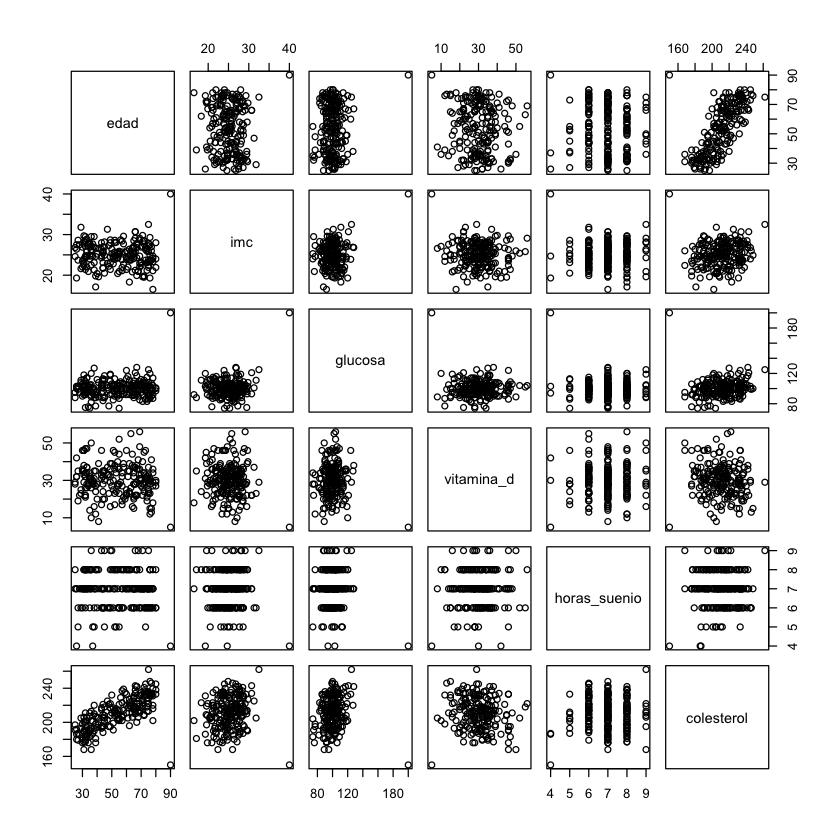

In [19]:
pairs(datos)

In [20]:
cor(datos)

edad        imc           glucosa     vitamina_d  horas_suenio 
edad          1.00000000 -0.0233585129  0.13752366 -0.09101700 -0.0510682000
imc          -0.02335851  1.0000000000  0.21220759 -0.09639736 -0.0006328947
glucosa       0.13752366  0.2122075853  1.00000000 -0.05716712 -0.0672405756
vitamina_d   -0.09101700 -0.0963973622 -0.05716712  1.00000000  0.0466550238
horas_suenio -0.05106820 -0.0006328947 -0.06724058  0.04665502  1.0000000000
colesterol    0.72898453  0.1295452907  0.09745294 -0.13349132  0.0290530211
             colesterol 
edad          0.72898453
imc           0.12954529
glucosa       0.09745294
vitamina_d   -0.13349132
horas_suenio  0.02905302
colesterol    1.00000000

In [21]:
# hacemos la regresion con el modelo completo
ajuste_full <- lm(colesterol~., data = datos)

In [22]:
summary(ajuste_full)


Call:
lm(formula = colesterol ~ ., data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.843  -7.280  -0.019   8.619  25.032 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  143.23662   12.50484  11.454  < 2e-16 ***
edad           0.83863    0.05494  15.266  < 2e-16 ***
imc            0.90062    0.29610   3.042  0.00268 ** 
glucosa       -0.05231    0.07576  -0.690  0.49073    
vitamina_d    -0.12239    0.10227  -1.197  0.23289    
horas_suenio   1.29463    0.91871   1.409  0.16037    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.61 on 195 degrees of freedom
Multiple R-squared:  0.5616,	Adjusted R-squared:  0.5503 
F-statistic: 49.95 on 5 and 195 DF,  p-value: < 2.2e-16


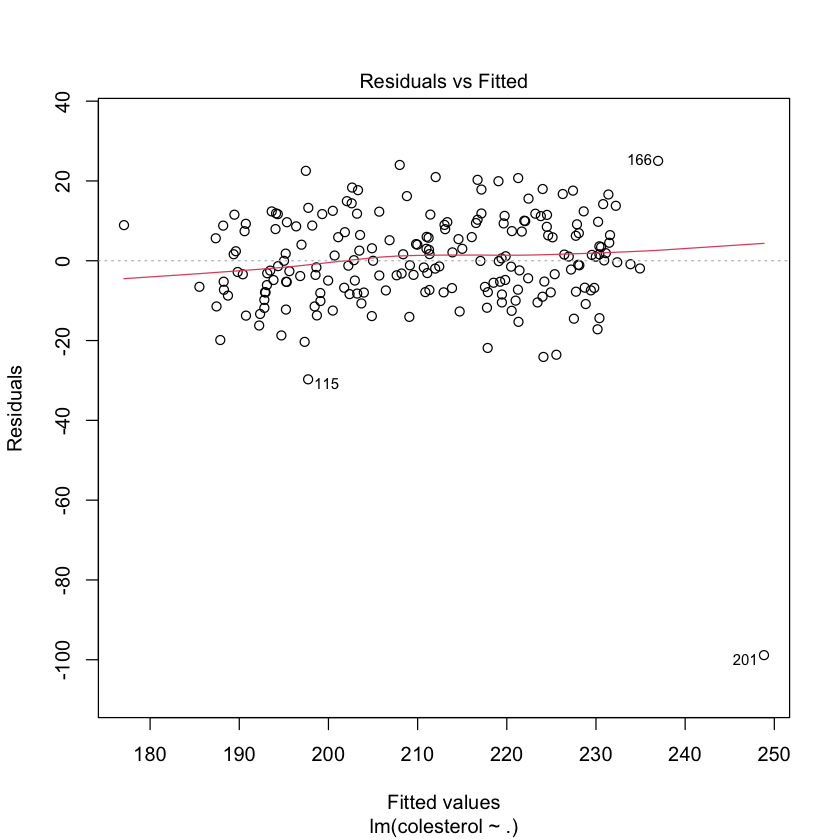

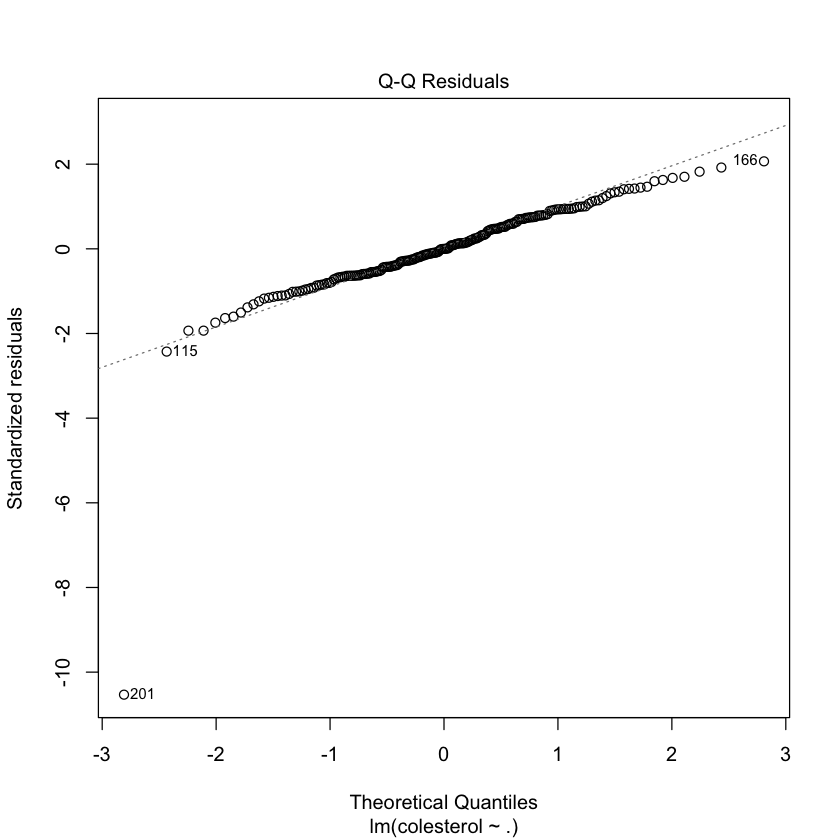

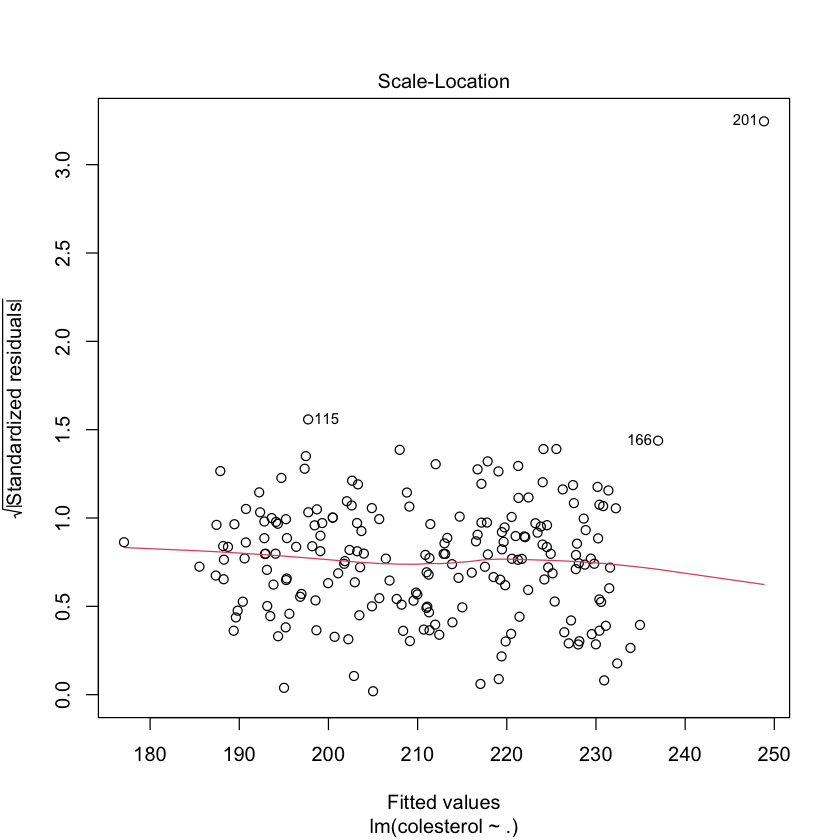

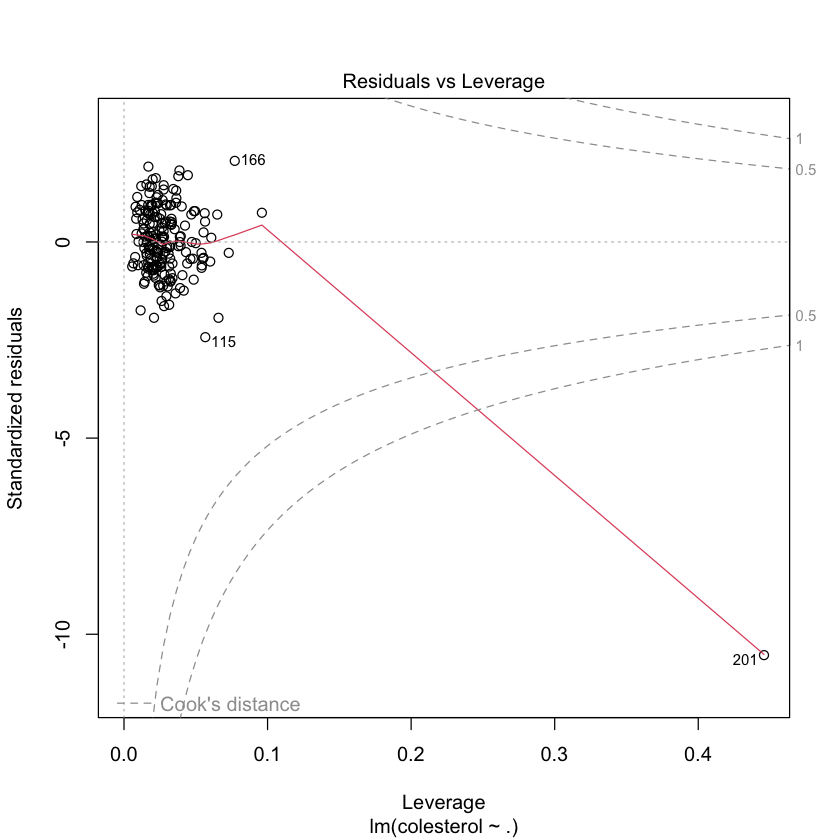

In [23]:
plot(ajuste_full)

In [28]:
# Saco la observación 201
datos <- datos[-201,]

In [29]:
# Vuelvo a hacer el ajuste sin esta observación
ajuste_full <- lm(colesterol~., data = datos)

summary(ajuste_full)


Call:
lm(formula = colesterol ~ ., data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.480  -5.234   0.020   5.929  24.257 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  87.97442    8.92717   9.855  < 2e-16 ***
edad          0.89224    0.03632  24.567  < 2e-16 ***
imc           1.80336    0.20293   8.887 4.31e-16 ***
glucosa       0.46625    0.05948   7.839 2.94e-13 ***
vitamina_d   -0.31963    0.06845  -4.670 5.62e-06 ***
horas_suenio -0.92820    0.62054  -1.496    0.136    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.299 on 194 degrees of freedom
Multiple R-squared:  0.8004,	Adjusted R-squared:  0.7952 
F-statistic: 155.6 on 5 and 194 DF,  p-value: < 2.2e-16


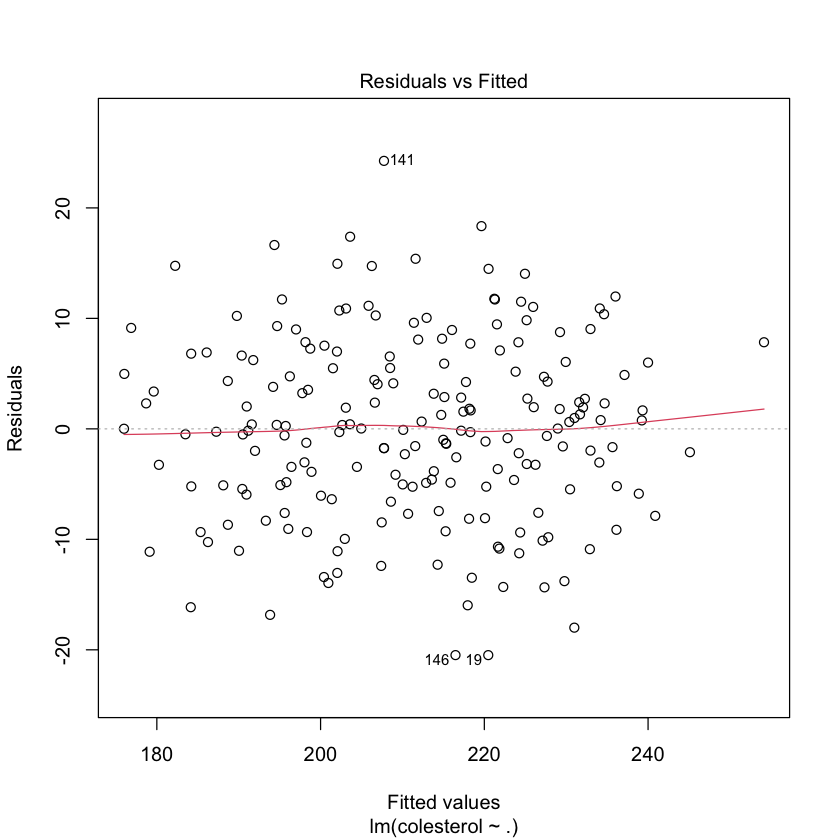

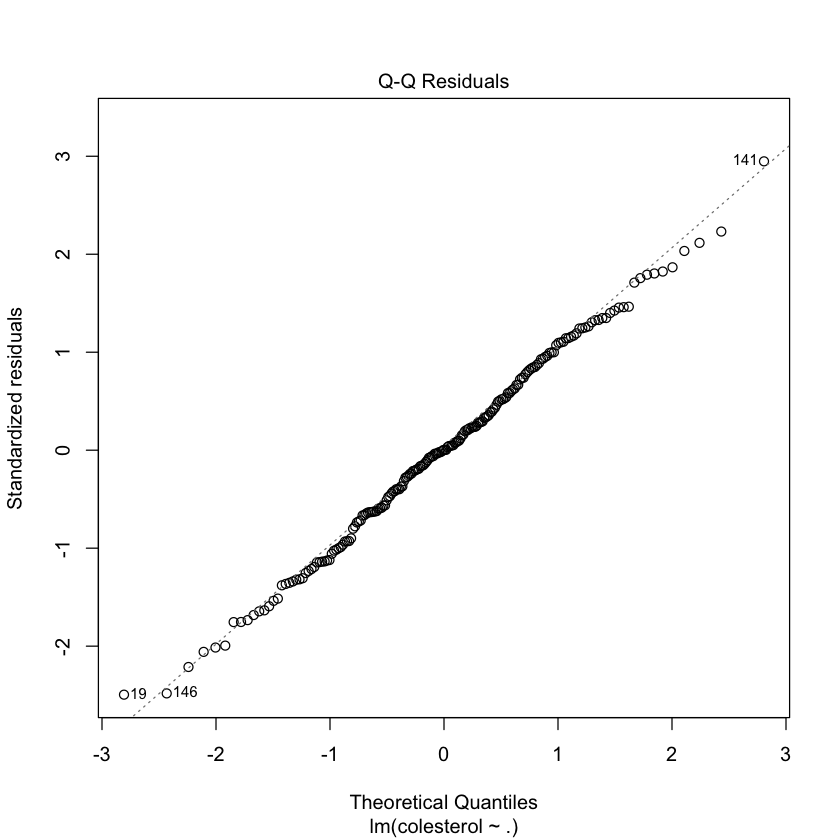

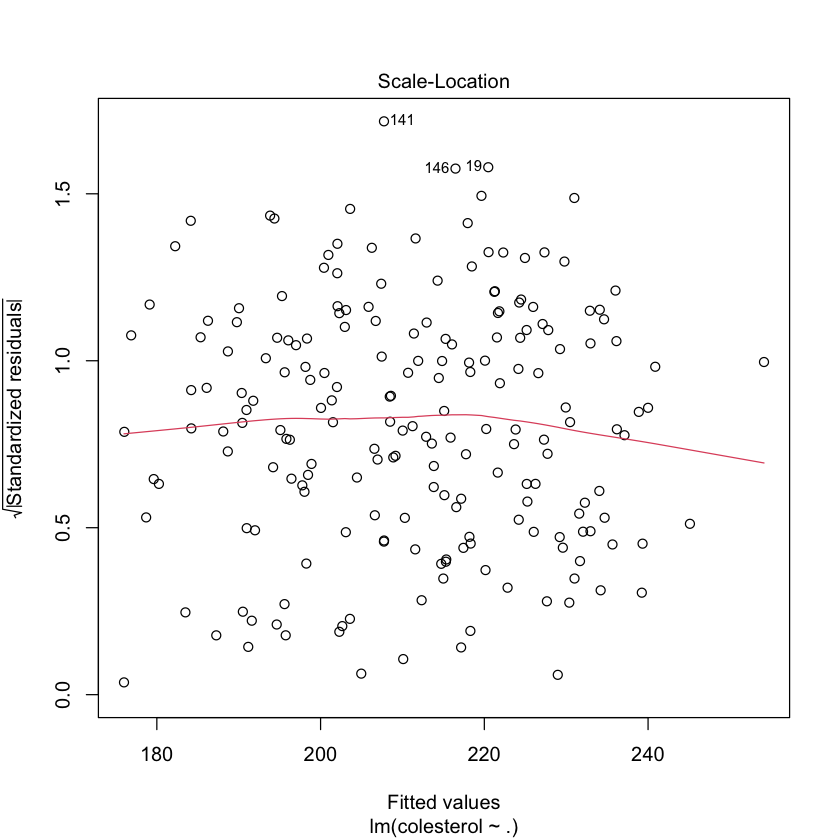

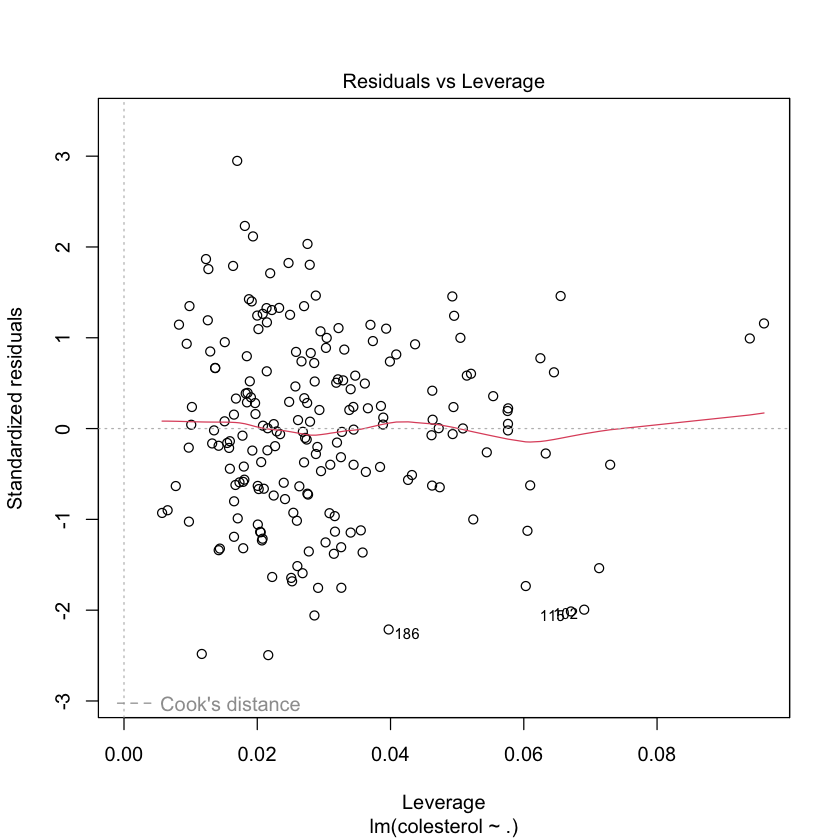

In [30]:
plot(ajuste_full)

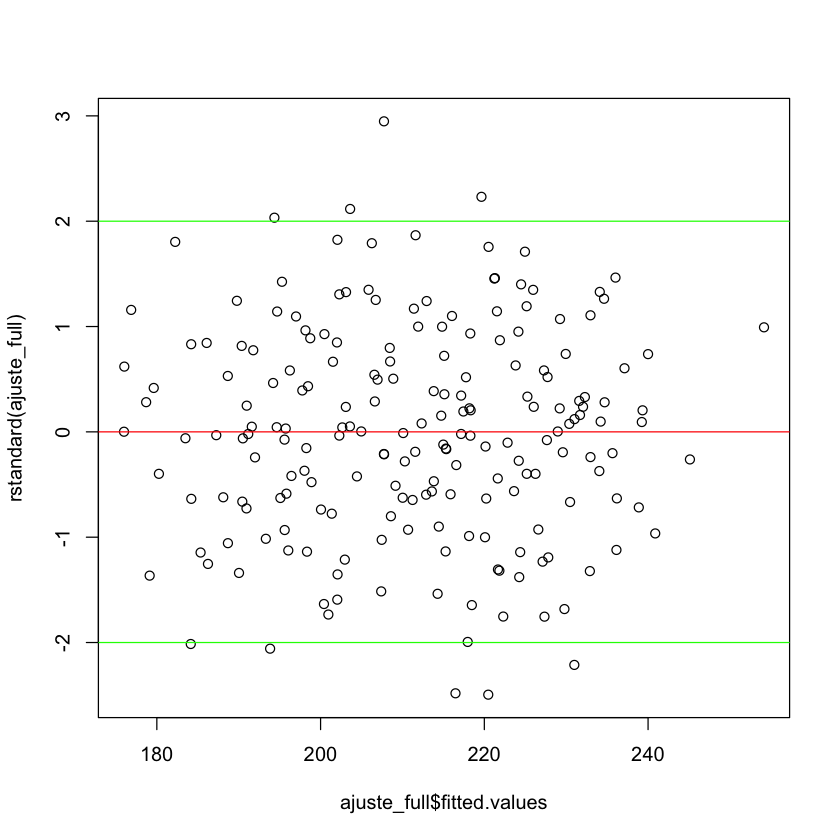

In [31]:
plot(ajuste_full$fitted.values, rstandard(ajuste_full))
abline(0, 0, col = "red")
abline(-2, 0, col = "green")
abline(2, 0, col = "green")

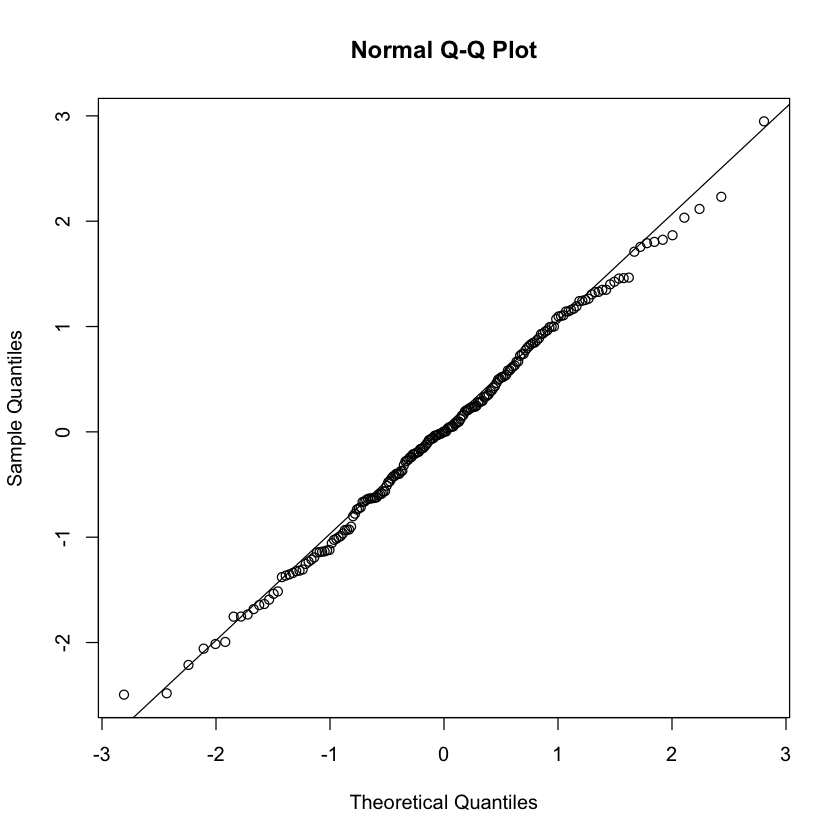

In [32]:
#normalidad de los residuos
qqnorm(rstandard(ajuste_full))
qqline(rstandard(ajuste_full))

In [33]:
# Test de shapiro wilks para normalidad
# H_0: Los datos provienen de una distribución normal 
# H_a: Los datos no provienen de una distribución normal.
shapiro.test(rstandard(ajuste_full))


	Shapiro-Wilk normality test

data:  rstandard(ajuste_full)
W = 0.99647, p-value = 0.9299


In [35]:
## puntos influyentes

# leverage
n <- nrow(datos)
p <- length(coef(ajuste_full)) 
leverage_umbral <- 2 * p / n

leverage <- hatvalues(ajuste_full)
alto.lev <- leverage[leverage > leverage_umbral]
alto.lev

14         30         64         74         75         91         98 
0.09604917 0.06248936 0.06054934 0.06329338 0.06095809 0.06552812 0.07296231 
       102        115        164        166        193        197 
0.06906540 0.06707286 0.06452668 0.09391780 0.06029639 0.07130578

In [36]:
# Distancia de cook
cooks_umbral <- qf(0.5,p,n-p)
cooks <- cooks.distance(ajuste_full)

alto.cook <- cooks[cooks>cooks_umbral]
alto.cook

named numeric(0)

In [37]:
# Eleccion de variables

# cantidad de variables
cant.var=length(ajuste_full$coefficients)-1
cant.var

# División 80/20
set.seed(13)
# colesterol es la variable Y (dependiente)
train_index <- createDataPartition(datos$colesterol, p = 0.8, list = FALSE)
head(train_index)
nrow(datos)
train_data <- datos[train_index, ]
nrow(train_data)
test_data <- datos[-train_index, ] #no se toca hasta el final, cuando ya elegi mi modelo, 
# entonces lo testeo en el conjunto de tests, que son las observaciones que no formaron parte de la definición del modelo 

[1] 5

Resample1
[1,] 1        
[2,] 2        
[3,] 3        
[4,] 4        
[5,] 5        
[6,] 6

[1] 200

[1] 161

In [38]:
# Ajuste de modelos con regsubsets
#por default hace el metodo exhaustivo. Opciones: method="backward" o method="backward")

#metodo exhaustivo
ajuste <- regsubsets(colesterol ~ ., data = train_data, nvmax = cant.var)
resumen <- summary(ajuste)

In [39]:
# Crear tabla resumen
tabla <- data.frame(
  Variables = 1:cant.var,
  R2_ajustado = resumen$adjr2,
  BIC = resumen$bic
)

knitr::kable(tabla, digits = 3)



| Variables| R2_ajustado|      BIC|
|---------:|-----------:|--------:|
|         1|       0.623| -147.833|
|         2|       0.726| -195.210|
|         3|       0.778| -225.050|
|         4|       0.789| -228.818|
|         5|       0.789| -225.042|

In [ ]:
# el menor BIC es para 4 variables
# el menor R2_ajust es para 4 o 5 variables

In [40]:
# Identificar el mejor modelo según cada criterio
mejor_R2 <- which.max(resumen$adjr2)
mejor_BIC <- which.min(resumen$bic)

cat("Mejor R2 ajustado →", mejor_R2, "variables\n")
cat("Mejor BIC         →", mejor_BIC, "variables\n")

Mejor R2 ajustado → 5 variables
Mejor BIC         → 4 variables


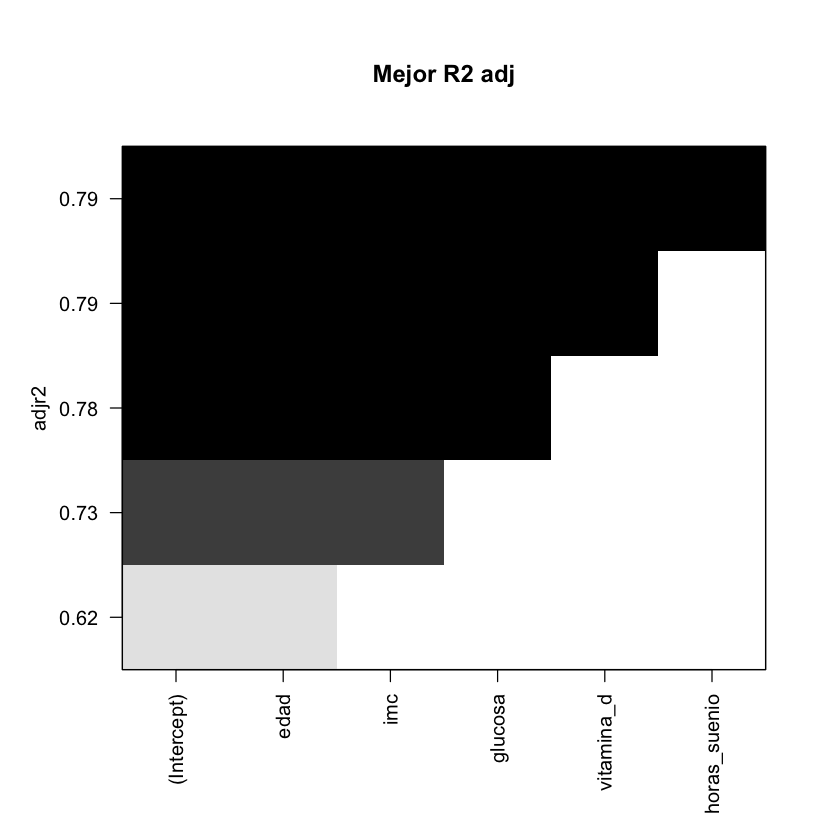

In [43]:
# Visualizar selección con gráfico
plot(ajuste, scale = "adjr2", main = "Mejor R2 adj")

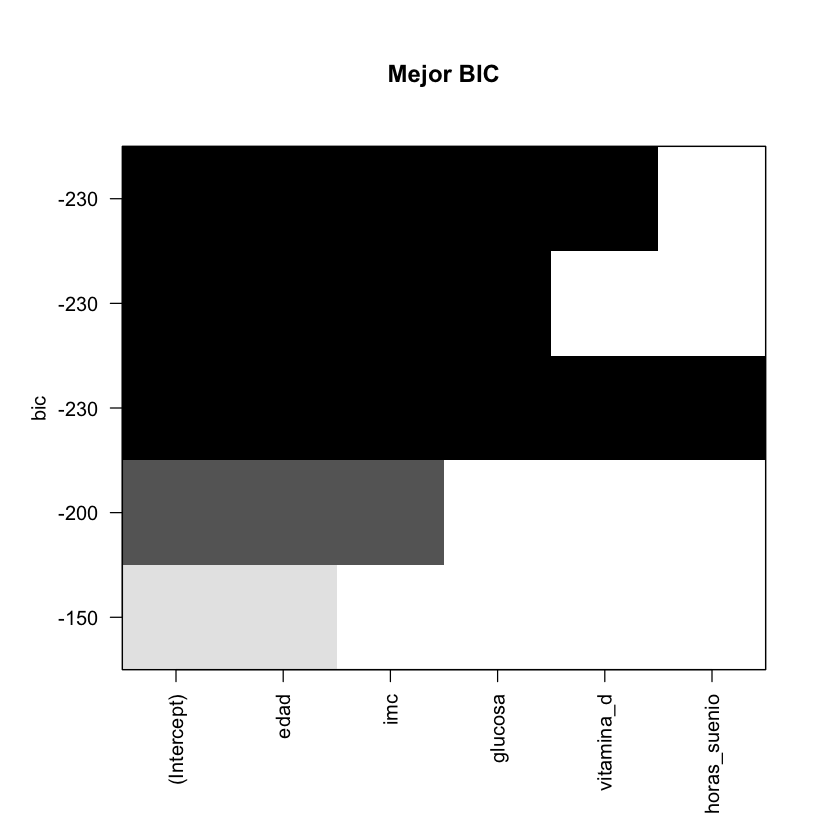

In [45]:
plot(ajuste, scale = "bic", main = "Mejor BIC")

In [46]:
# Extraer nombres de variables del mejor modelo según BIC
# modelo BIC
variables_bic <- names(coef(ajuste, mejor_BIC))[-1]  # quitamos intercept
variables_bic

formula_bic <- as.formula(paste("colesterol ~", paste(variables_bic, collapse = "+")))
formula_bic

[1] "edad"       "imc"        "glucosa"    "vitamina_d"

colesterol ~ edad + imc + glucosa + vitamina_d

In [47]:
# Modelo R2
variables_R2 <- names(coef(ajuste, mejor_R2))[-1]  # quitamos intercept
variables_R2

formula_R2 <- as.formula(paste("colesterol ~", paste(variables_R2, collapse = "+")))
formula_R2

[1] "edad"         "imc"          "glucosa"      "vitamina_d"   "horas_suenio"

colesterol ~ edad + imc + glucosa + vitamina_d + horas_suenio

In [48]:
# YA TENGO ELEGIDAS LOS DOS MODELOS
# HAGO CV PARA ELEGIR UNO

# Control de validación cruzada 5-fold en el conjunto de entrenamiento
control <- trainControl(method = "cv", number = 5)

# Entrenar modelo lineal con validación cruzada en train_data
cv.R2 <- train(formula_R2, data = train_data, method = "lm", trControl = control)

# Resultados entrenamiento con CV
cv.R2

Linear Regression 

161 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 129, 128, 129, 129, 129 
Resampling results:

  RMSE     Rsquared   MAE     
  8.39191  0.7889911  6.848577

Tuning parameter 'intercept' was held constant at a value of TRUE

* RMSE = $\sum (Y_i - \hat Y_i)^2$
* $R^2$ = 1 - $\dfrac {\sum (Y_i - \hat Y_i)^2}{\sum (Y_i - \bar Y_i)^2}$
* MAE (Module Absolute Error) = $\sum |Y_i - \hat Y_i|$

In [51]:
# Entrenamos el modelo BIC

# Entrenar modelo lineal con validación cruzada en train_data
cv.bic <- train(formula_bic, data = train_data, method = "lm", trControl = control)

cv.bic

Linear Regression 

161 samples
  4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 129, 128, 129, 129, 129 
Resampling results:

  RMSE      Rsquared   MAE     
  8.447055  0.7868655  6.821367

Tuning parameter 'intercept' was held constant at a value of TRUE

In [52]:
# Evaluacion final

# Predicción en test_data
# Si elegimos BIC

## Estimamos los parametros con el 80%
modelo.80<-lm(formula_bic, data=train_data)
summary(modelo.80)


Call:
lm(formula = formula_bic, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.1127  -5.7574   0.5435   5.6331  22.1357 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.88276    9.06232   8.925 1.15e-15 ***
edad         0.92277    0.04171  22.126  < 2e-16 ***
imc          1.86798    0.23109   8.084 1.63e-13 ***
glucosa      0.41982    0.06461   6.498 1.04e-09 ***
vitamina_d  -0.22865    0.07701  -2.969  0.00346 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.416 on 156 degrees of freedom
Multiple R-squared:  0.7938,	Adjusted R-squared:  0.7885 
F-statistic: 150.2 on 4 and 156 DF,  p-value: < 2.2e-16


In [53]:
#comparo con el modelo completo
summary(ajuste_full)


Call:
lm(formula = colesterol ~ ., data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.480  -5.234   0.020   5.929  24.257 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  87.97442    8.92717   9.855  < 2e-16 ***
edad          0.89224    0.03632  24.567  < 2e-16 ***
imc           1.80336    0.20293   8.887 4.31e-16 ***
glucosa       0.46625    0.05948   7.839 2.94e-13 ***
vitamina_d   -0.31963    0.06845  -4.670 5.62e-06 ***
horas_suenio -0.92820    0.62054  -1.496    0.136    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.299 on 194 degrees of freedom
Multiple R-squared:  0.8004,	Adjusted R-squared:  0.7952 
F-statistic: 155.6 on 5 and 194 DF,  p-value: < 2.2e-16


In [55]:
library(car)
vif(modelo.80)

edad        imc    glucosa vitamina_d 
  1.025119   1.031164   1.012492   1.012745

* Observo con el VIF que no hay multicolinealidad

In [57]:
# Obtener solo las variables necesarias para test_data
vars_mejor.bic <- all.vars(formula_bic)
test_data_filtrado.bic <- test_data[vars_mejor.bic]

head(test_data_filtrado.bic)
# Predecir con el modelo ganador sobre las variables correctas

test.df <- data.frame(test_data_filtrado.bic[,-1]) #saco la variable respuesta
predicciones_test.bic <- predict(modelo.80, newdata = test.df)

# Calcular RMSE en test_data
rmse_final.bic <- sqrt(mean((test_data_filtrado.bic$colesterol - predicciones_test.bic)^2))
cat("RMSE final en conjunto test (20%):", rmse_final.bic, "\n")

colesterol edad imc  glucosa vitamina_d
9  211        60   26.0  92     25        
11 217        49   21.4 110     29        
12 232        77   23.7  90     15        
13 217        61   24.1 105     32        
29 208        72   19.8 111     34        
32 183        33   24.8  95     37

RMSE final en conjunto test (20%): 8.422518 


* Estamos bien porque el RMSE con train dio 8.44 y ahora con test dio 8.42
* Este es mi modelo final!!!

In [59]:
# Modelo final

modelo.80
summary(modelo.80)
# estimar los parámetro del modelo con la muestra completa de entrenamiento
# es decir, se reentrena el modelo con la muestra completa de entrenamiento

# Observación: si se tiene que predecir una nueva observación que no conocemos la variable respuesta
# entonces tiene sentido reentrenar el modelo con los datos completos


Call:
lm(formula = formula_bic, data = train_data)

Coefficients:
(Intercept)         edad          imc      glucosa   vitamina_d  
    80.8828       0.9228       1.8680       0.4198      -0.2287  



Call:
lm(formula = formula_bic, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.1127  -5.7574   0.5435   5.6331  22.1357 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.88276    9.06232   8.925 1.15e-15 ***
edad         0.92277    0.04171  22.126  < 2e-16 ***
imc          1.86798    0.23109   8.084 1.63e-13 ***
glucosa      0.41982    0.06461   6.498 1.04e-09 ***
vitamina_d  -0.22865    0.07701  -2.969  0.00346 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.416 on 156 degrees of freedom
Multiple R-squared:  0.7938,	Adjusted R-squared:  0.7885 
F-statistic: 150.2 on 4 and 156 DF,  p-value: < 2.2e-16
